In [ ]:
# Install required packages
%pip install pandas numpy matplotlib scipy

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
%matplotlib inline


## Cultural + AI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets from the Cultural data folder
schooling_df = pd.read_csv('data/gapminder/Cultural/ddf--datapoints--mean_years_in_school_men_15_to_24_years--by--geo--time.csv')
unemployment_df = pd.read_csv('data/gapminder/Cultural/ddf--datapoints--males_aged_15_24_unemployment_rate_percent--by--geo--time.csv')

# Calculate the worldwide mean per year for both datasets
schooling_yearly = schooling_df.groupby('time')['mean_years_in_school_men_15_to_24_years'].mean()
unemployment_yearly = unemployment_df.groupby('time')['males_aged_15_24_unemployment_rate_percent'].mean()

# Limit the number of years until the second to last
schooling_yearly = schooling_yearly.iloc[:-1]
unemployment_yearly = unemployment_yearly.iloc[:-1]

# Create the dual axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Mean Years in School on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Years in School', color=color)
ax1.plot(schooling_yearly.index, schooling_yearly.values, color=color, linewidth=2, label='Mean Years in School')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Male Unemployment Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Male Unemployment Rate (%)', color=color)
ax2.plot(unemployment_yearly.index, unemployment_yearly.values, color=color, linewidth=2, label='Male Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Worldwide Mean Years in School vs. Male Unemployment Rate')
fig.tight_layout()
plt.show()


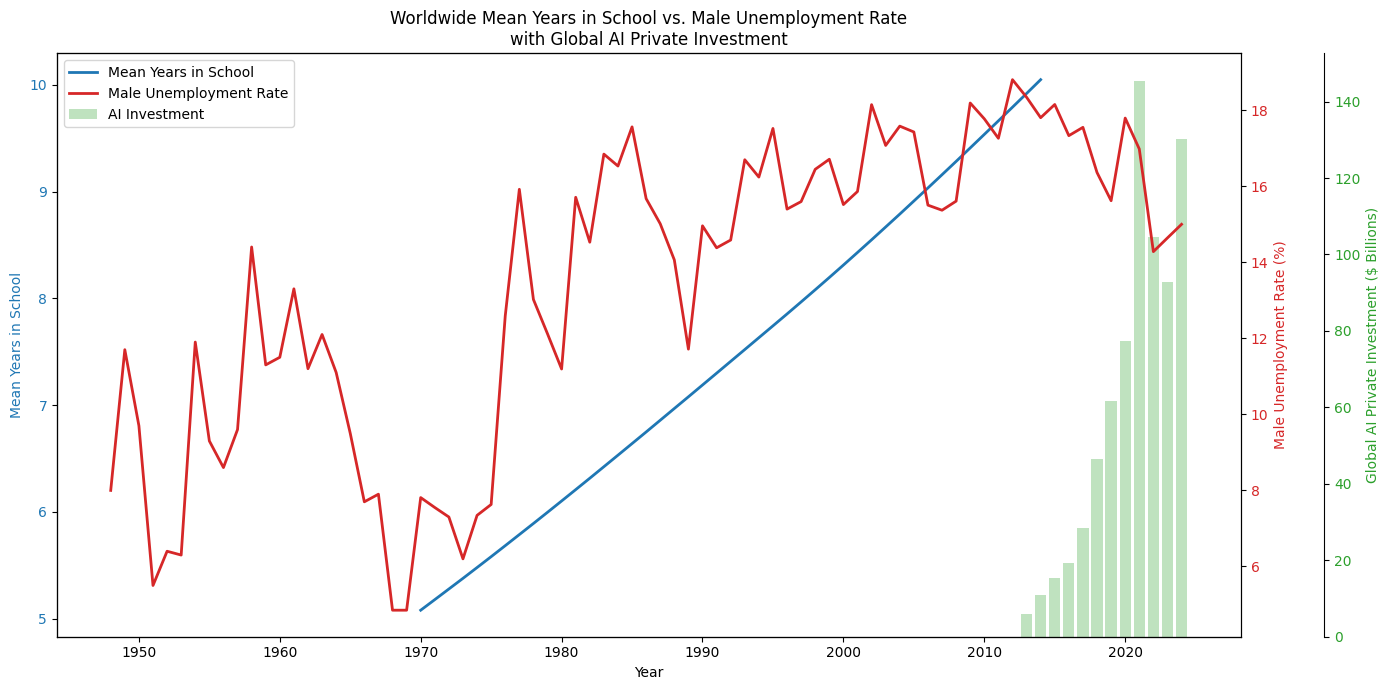

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets from the Cultural data folder
schooling_df = pd.read_csv('data/gapminder/Cultural/ddf--datapoints--mean_years_in_school_men_15_to_24_years--by--geo--time.csv')
unemployment_df = pd.read_csv('data/gapminder/Cultural/ddf--datapoints--males_aged_15_24_unemployment_rate_percent--by--geo--time.csv')

# Load AI investment data
ai_investment_df = pd.read_csv('data/gapminder/AI_Technology/private-investment-in-artificial-intelligence.csv')

# Calculate the worldwide mean per year for both datasets
schooling_yearly = schooling_df.groupby('time')['mean_years_in_school_men_15_to_24_years'].mean()
unemployment_yearly = unemployment_df.groupby('time')['males_aged_15_24_unemployment_rate_percent'].mean()

# Filter AI investment for World data and convert to billions
ai_world = ai_investment_df[ai_investment_df['Entity'] == 'World'].copy()
ai_world['Investment_Billions'] = ai_world['Global total private investment in AI'] / 1e9

# Limit the number of years until the second to last
schooling_yearly = schooling_yearly.iloc[:-1]
unemployment_yearly = unemployment_yearly.iloc[:-1]

# Create the dual axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot AI Investment as bar chart on the first axis (background)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
bars = ax3.bar(ai_world['Year'], ai_world['Investment_Billions'], 
               alpha=0.3, color='tab:green', label='AI Investment', width=0.8)
ax3.set_ylabel('Global AI Private Investment ($ Billions)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Plot Mean Years in School on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Years in School', color=color)
ax1.plot(schooling_yearly.index, schooling_yearly.values, color=color, linewidth=2, label='Mean Years in School')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_zorder(ax3.get_zorder() + 1)  # Bring line plots in front of bars
ax1.patch.set_visible(False)  # Make background transparent

# Create a second y-axis for Male Unemployment Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Male Unemployment Rate (%)', color=color)
ax2.plot(unemployment_yearly.index, unemployment_yearly.values, color=color, linewidth=2, label='Male Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_zorder(ax3.get_zorder() + 1)  # Bring line plots in front of bars

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

plt.title('Worldwide Mean Years in School vs. Male Unemployment Rate\nwith Global AI Private Investment')
fig.tight_layout()
plt.show()

Found 10 datasets


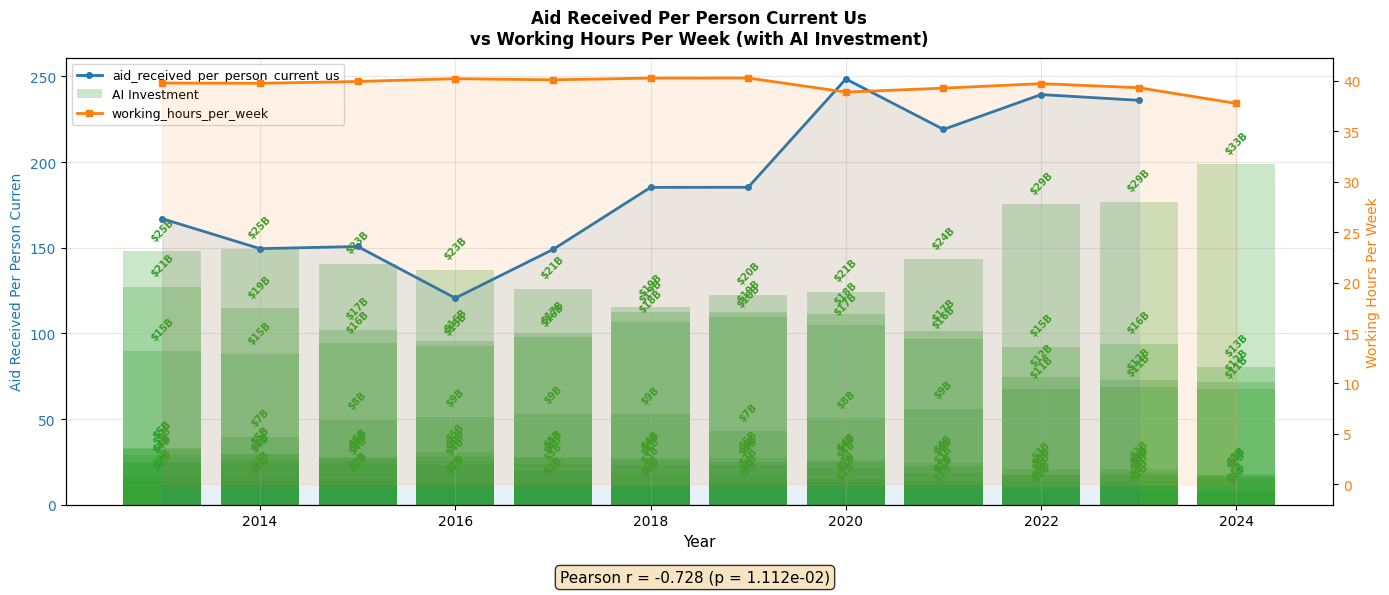

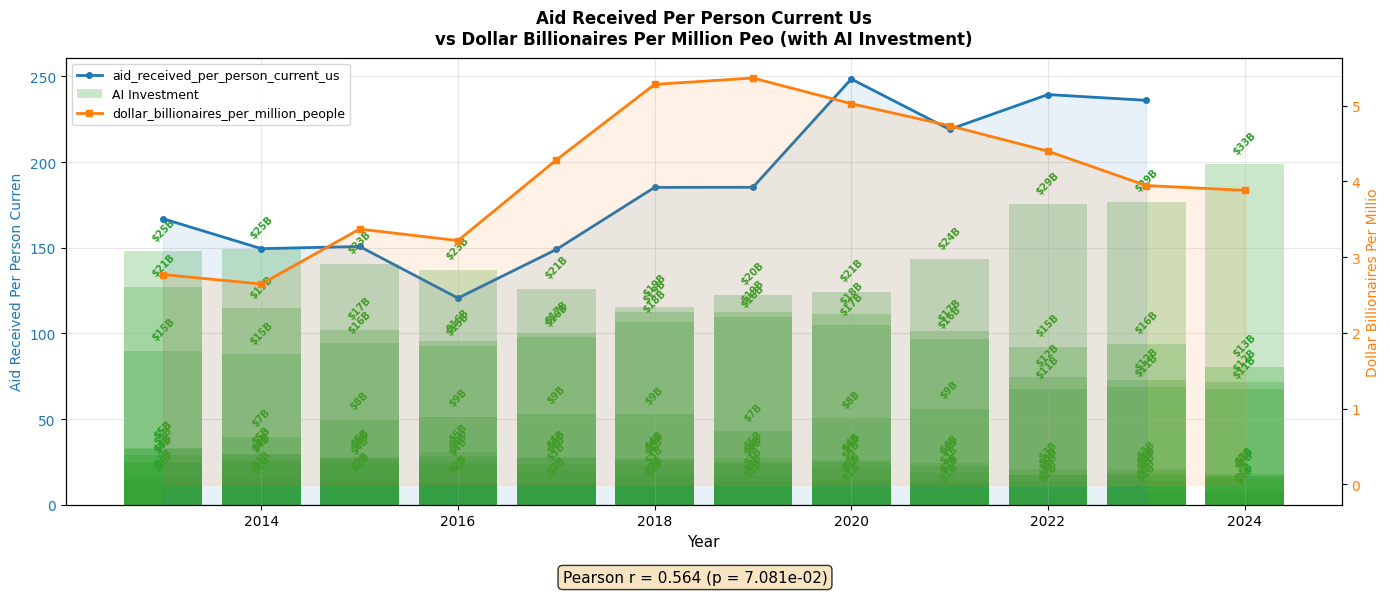

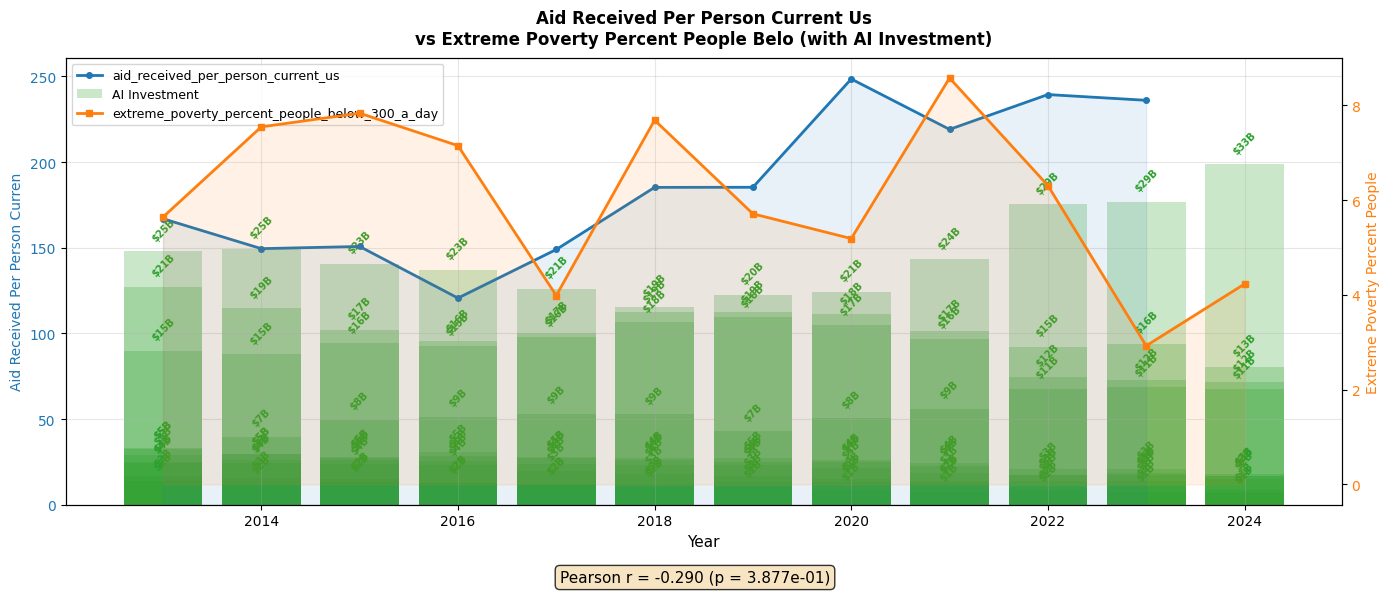

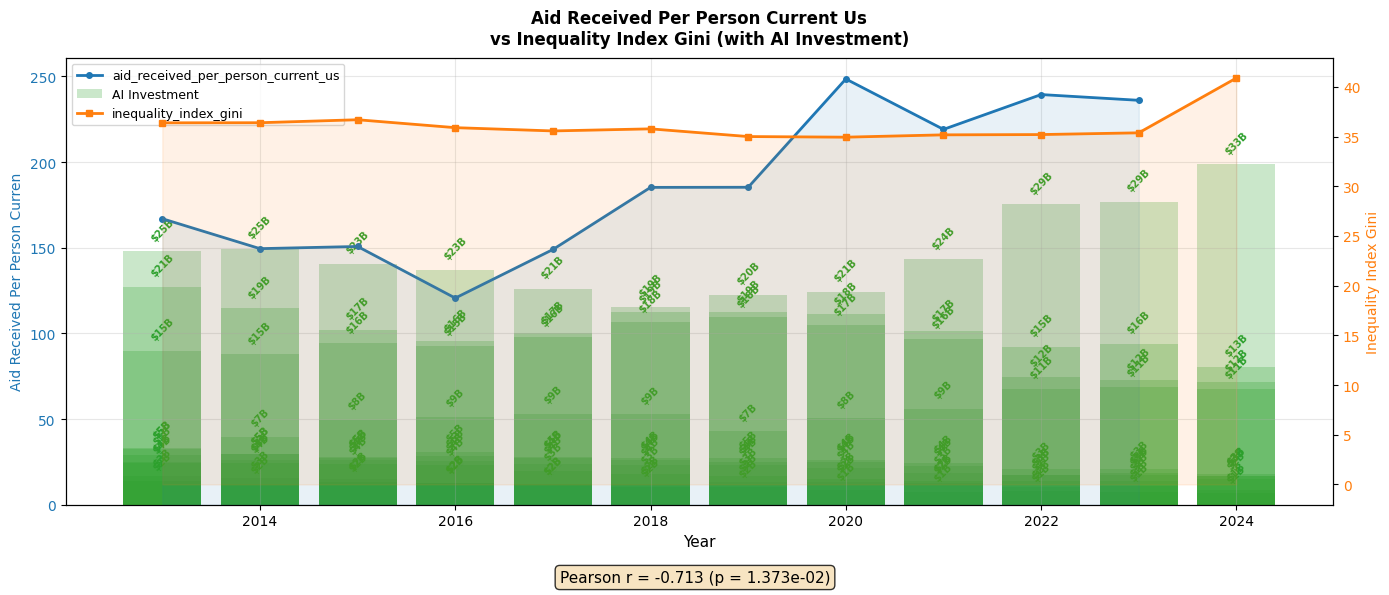

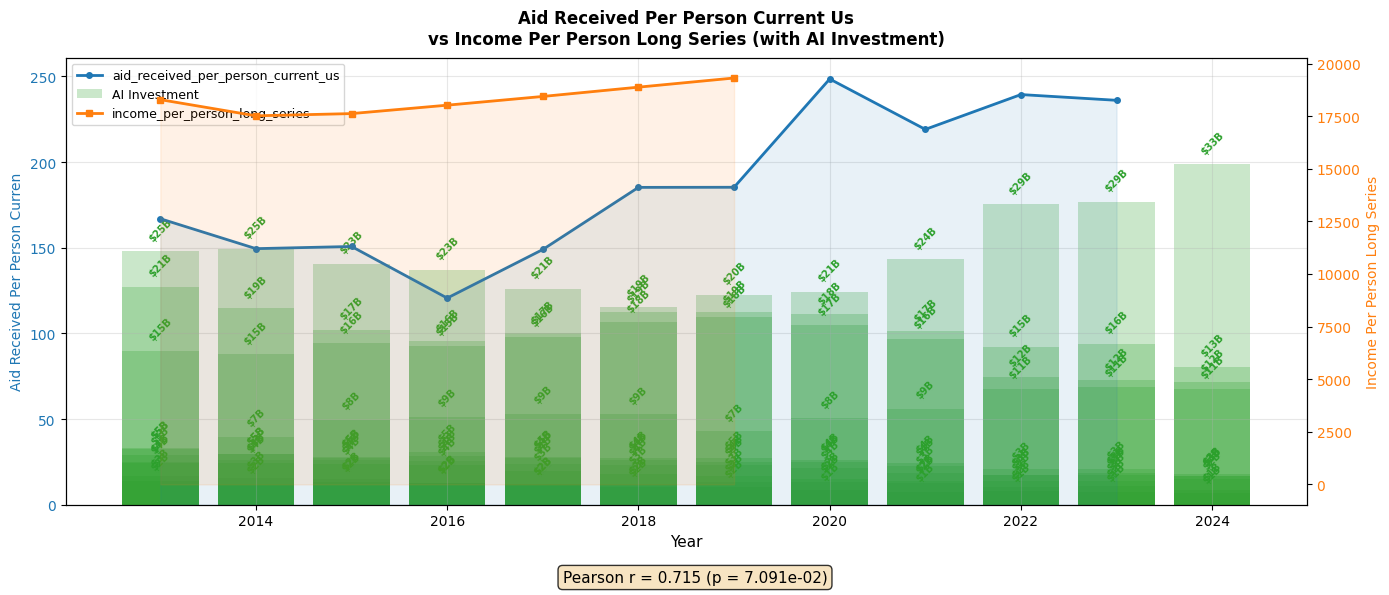

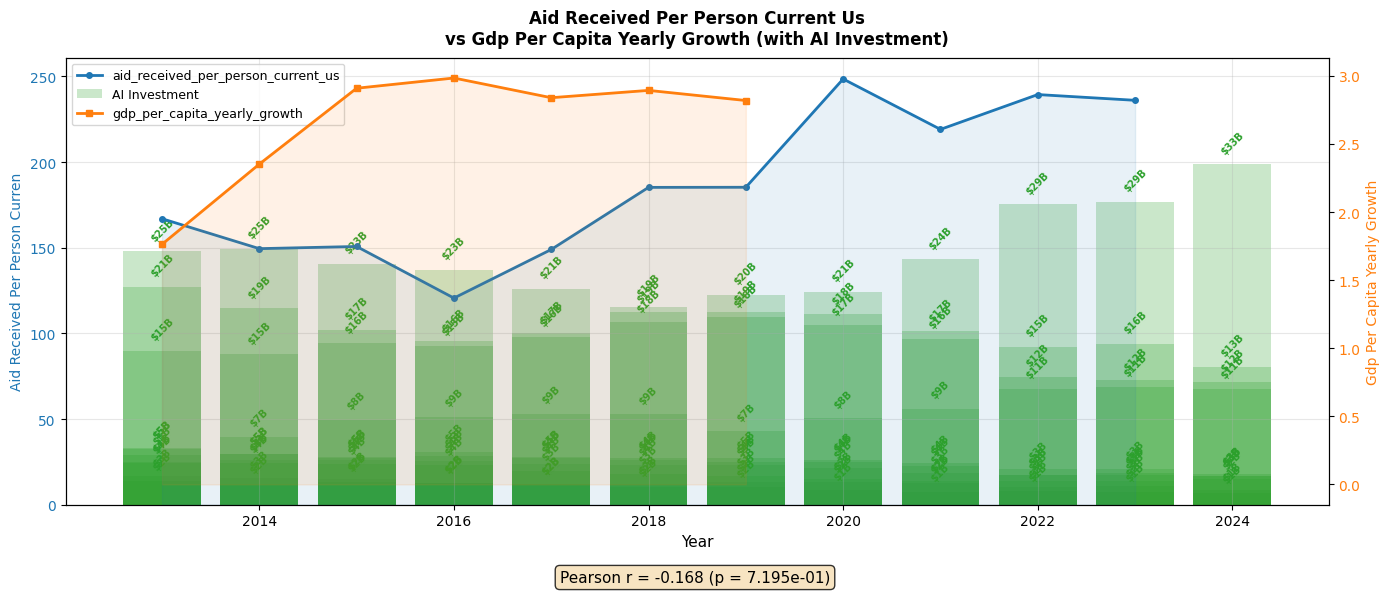

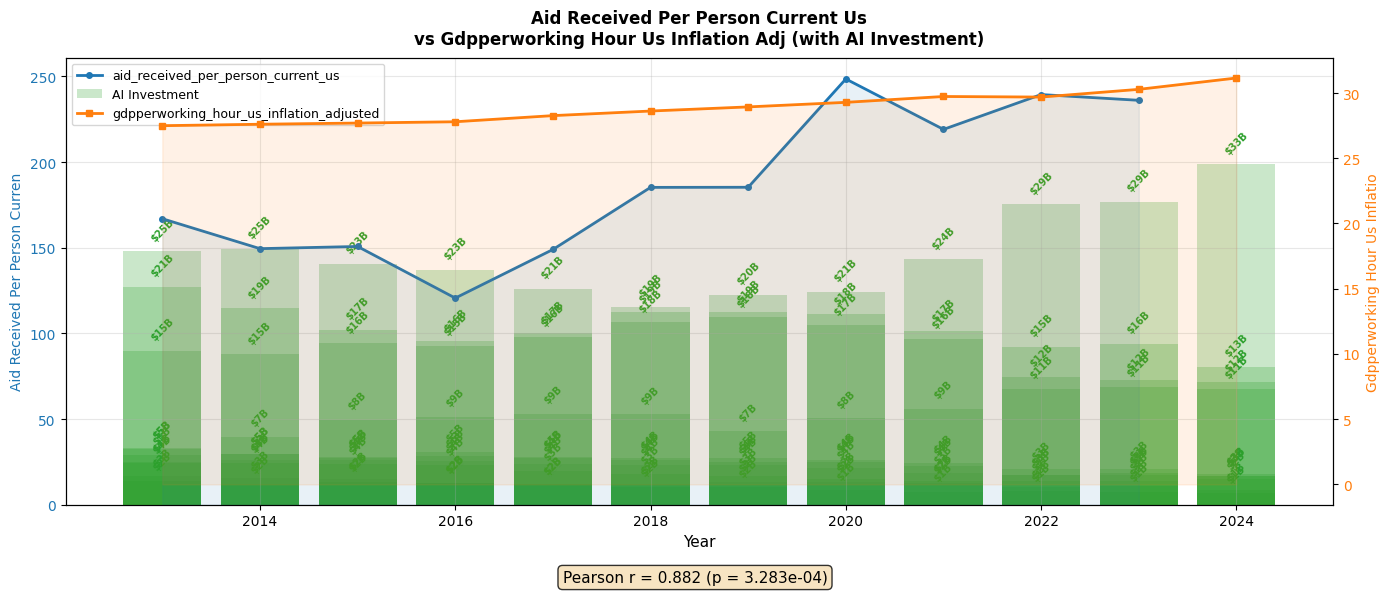

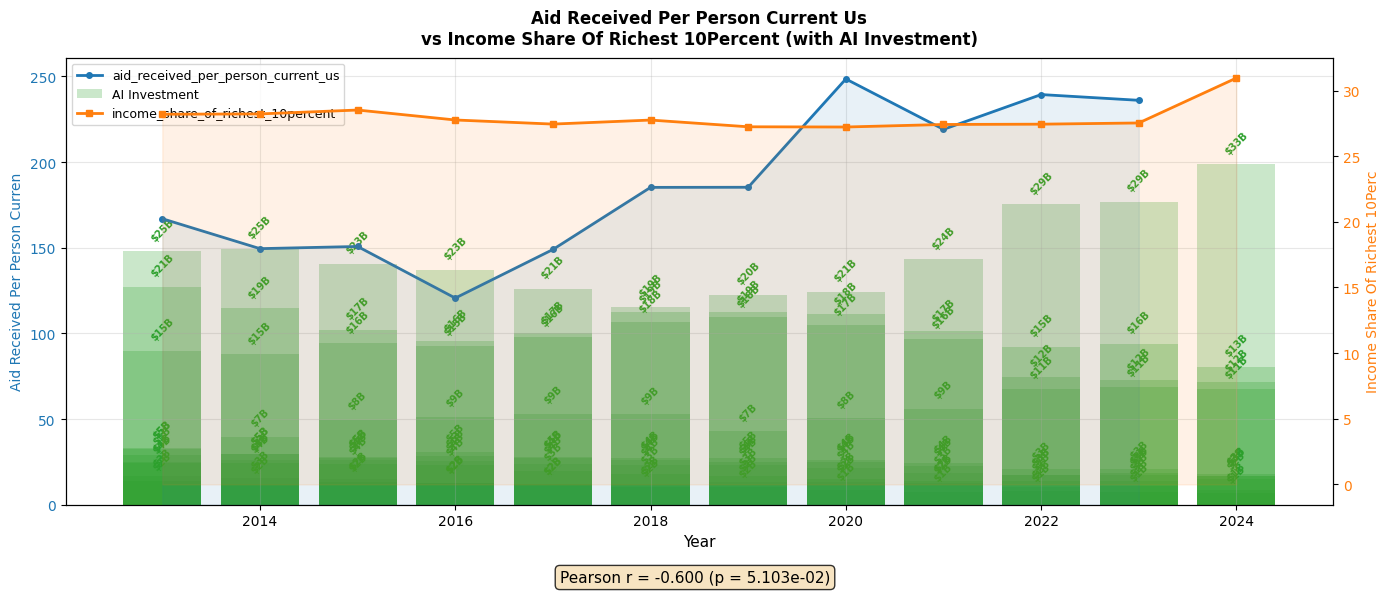

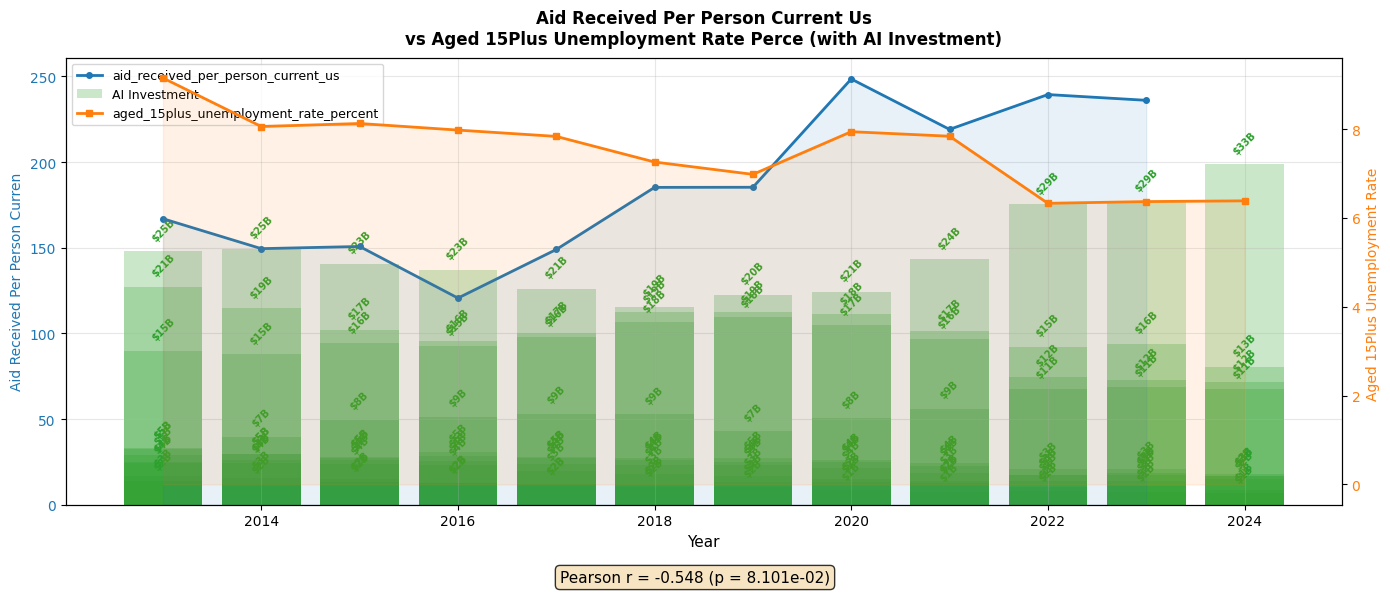

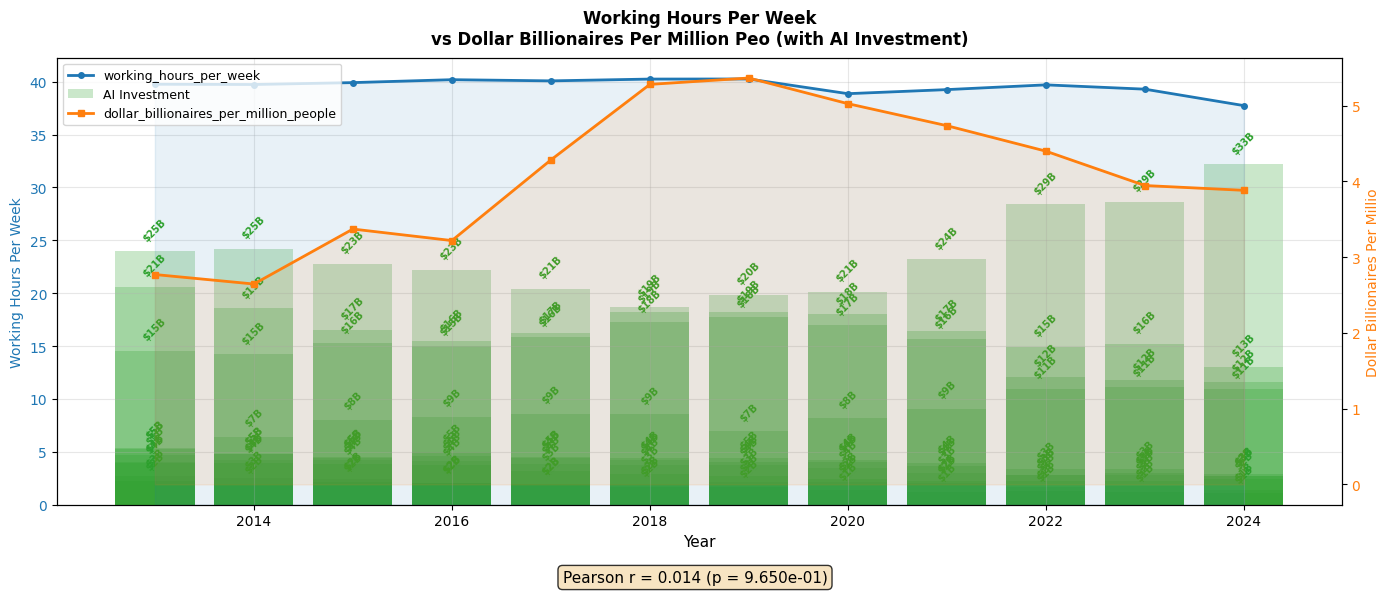

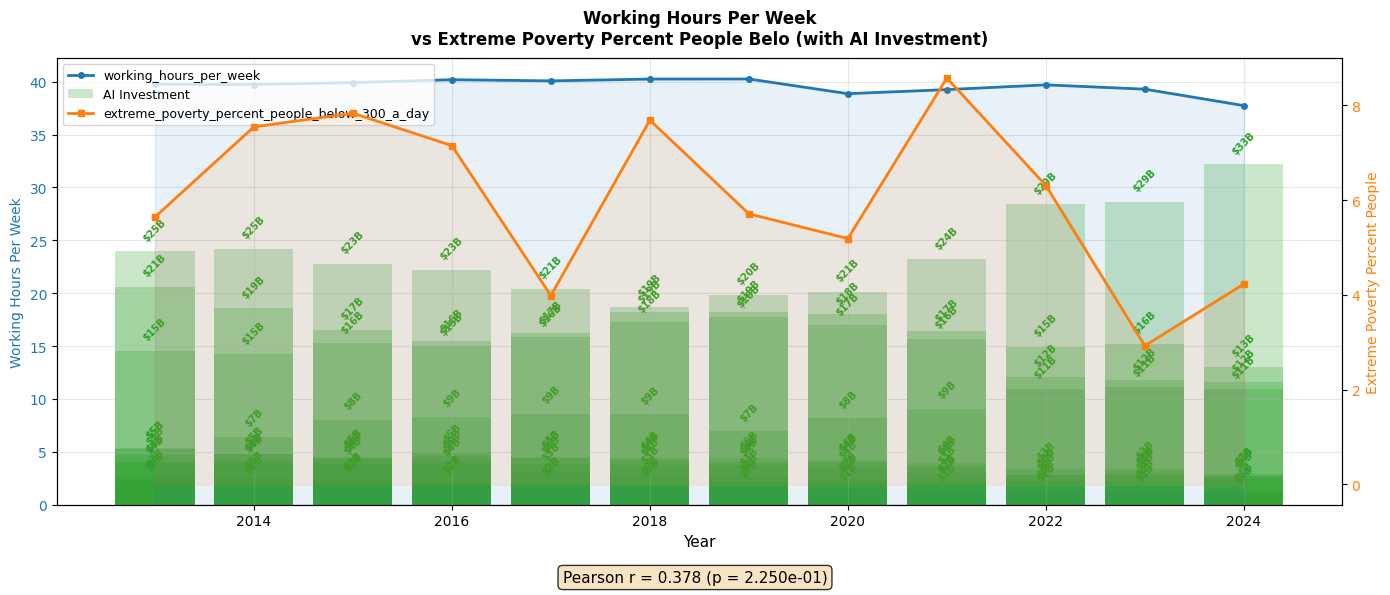

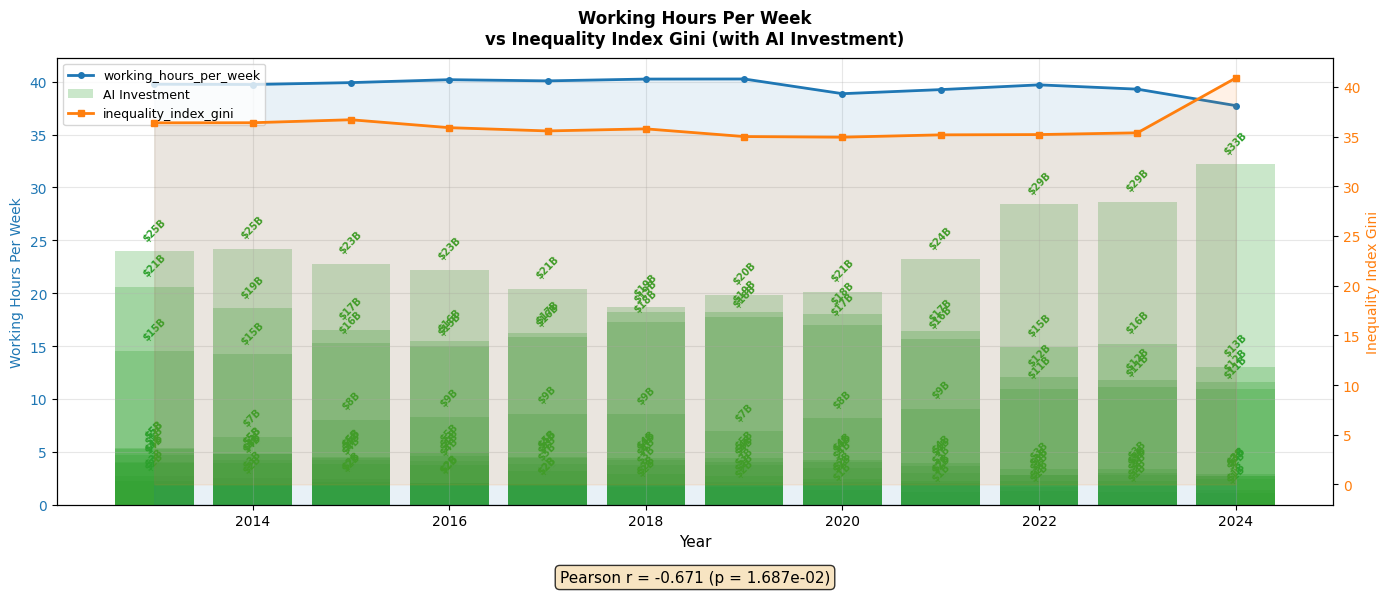

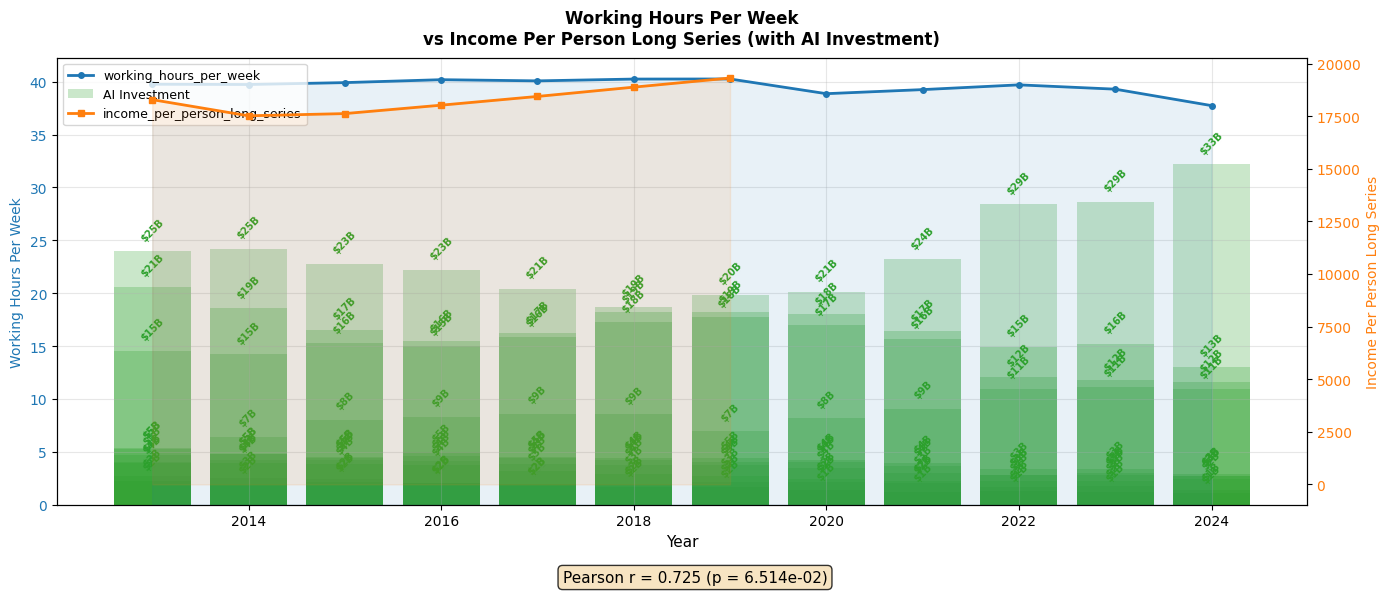

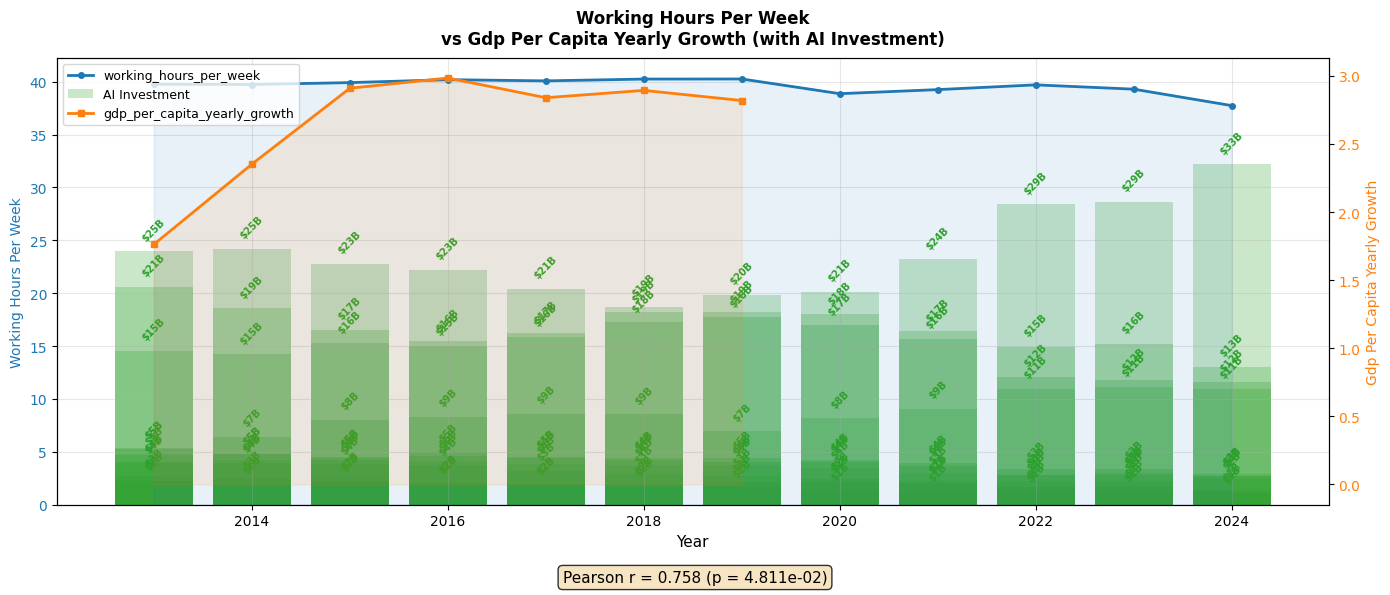

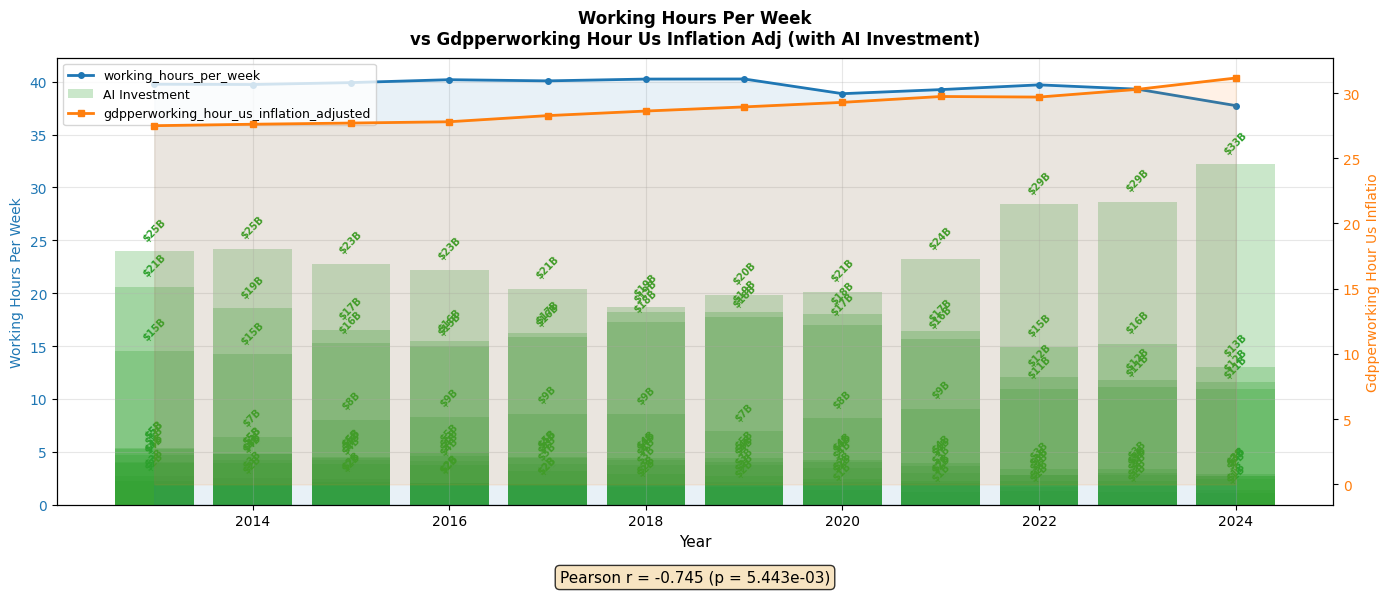

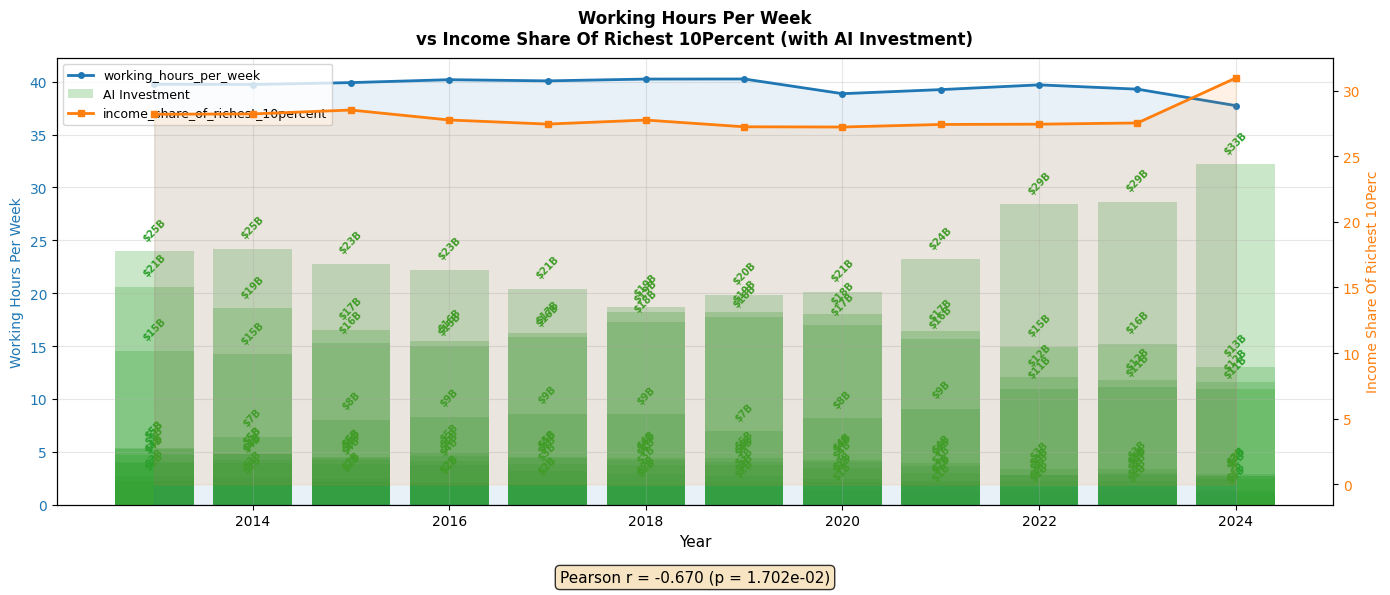

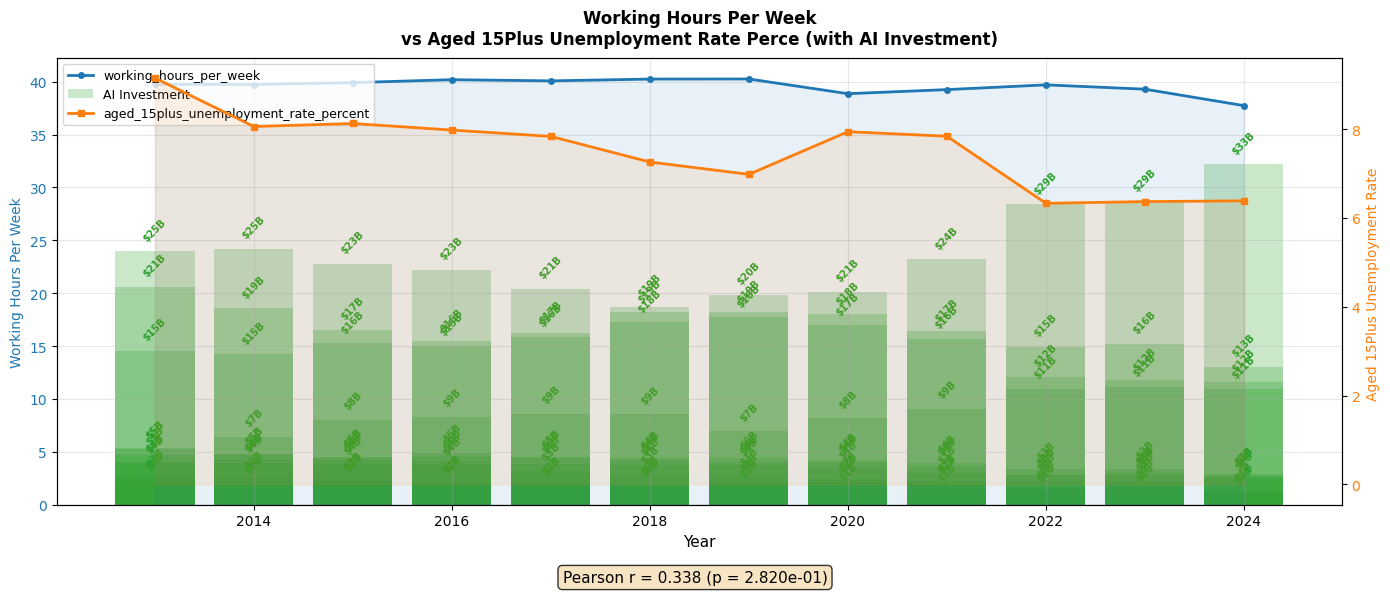

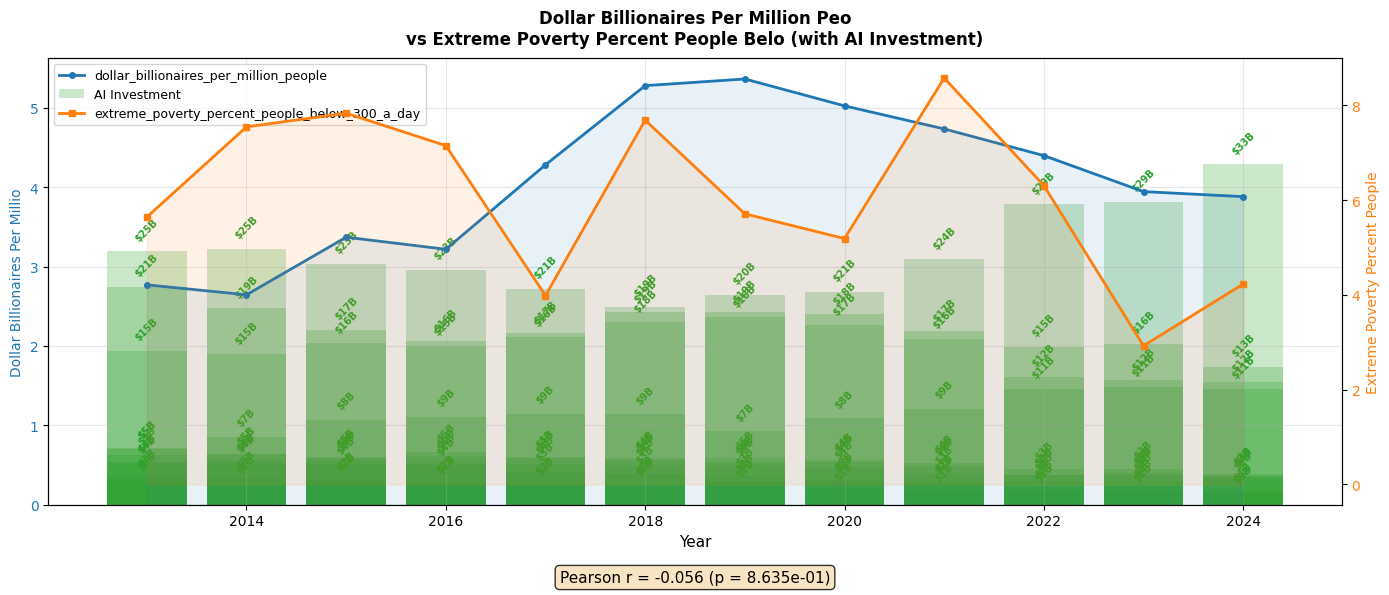

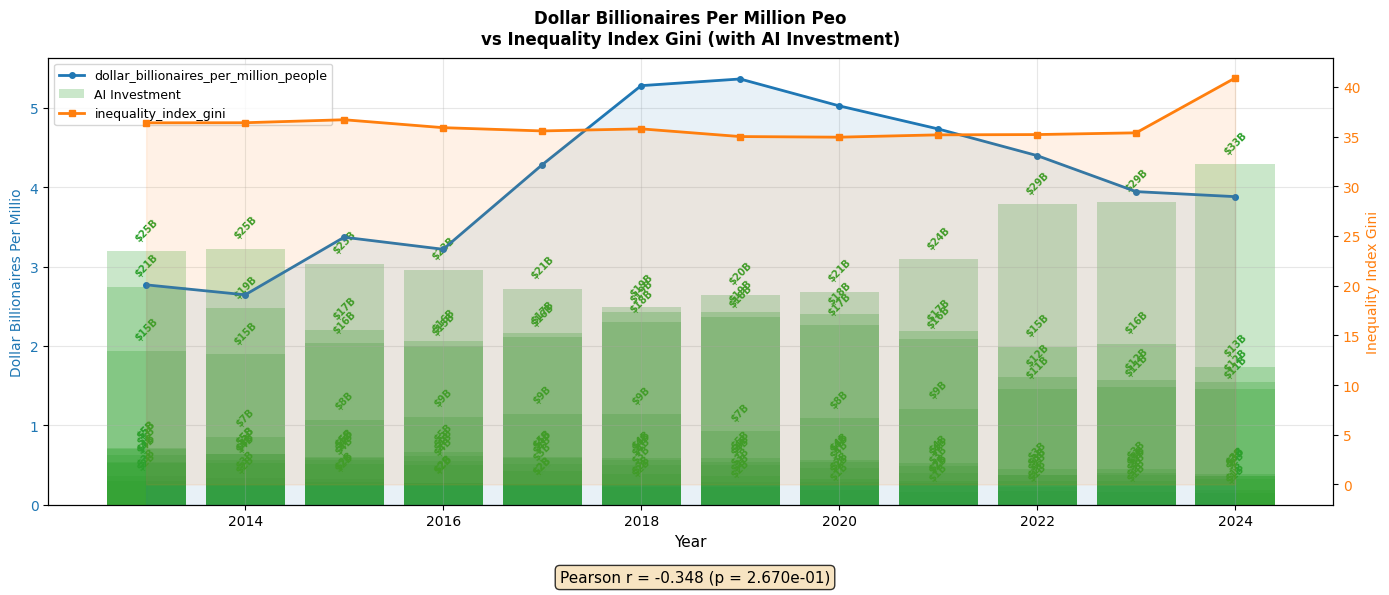

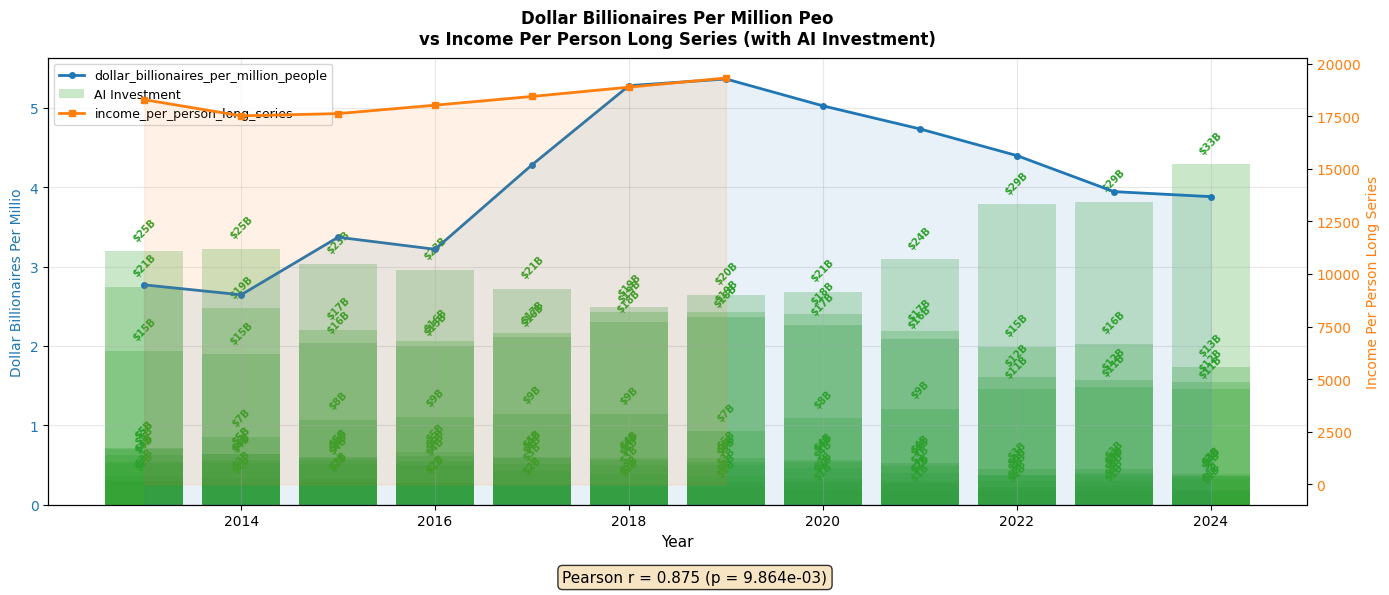

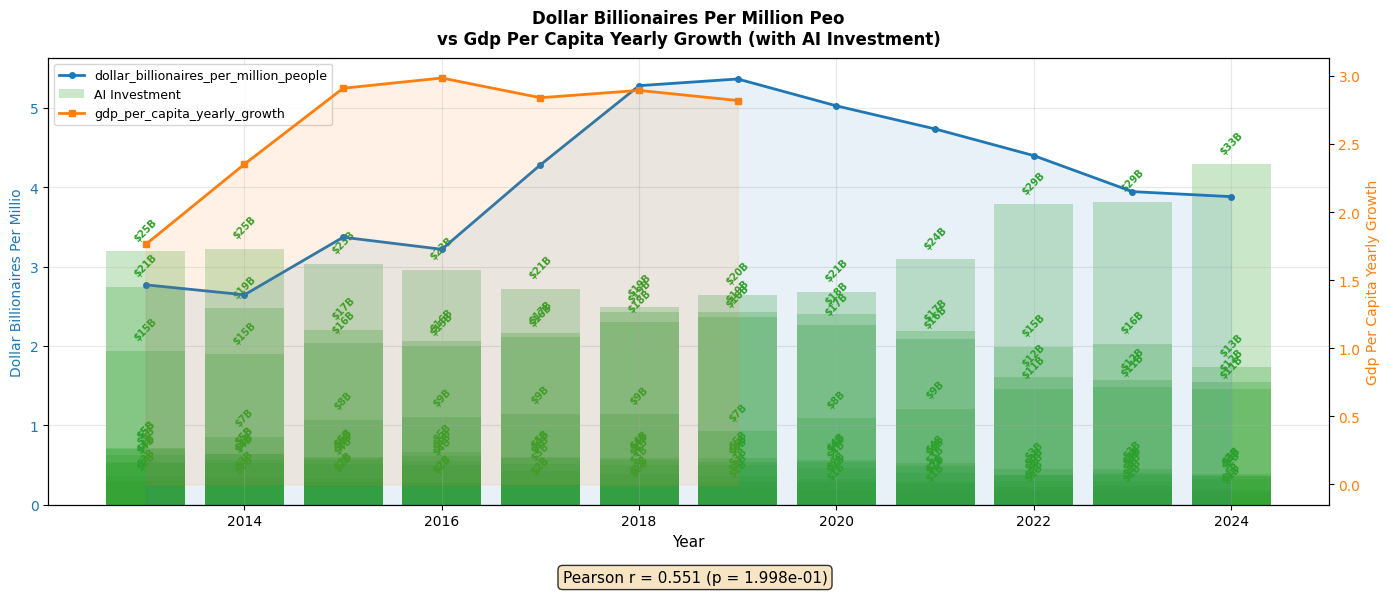

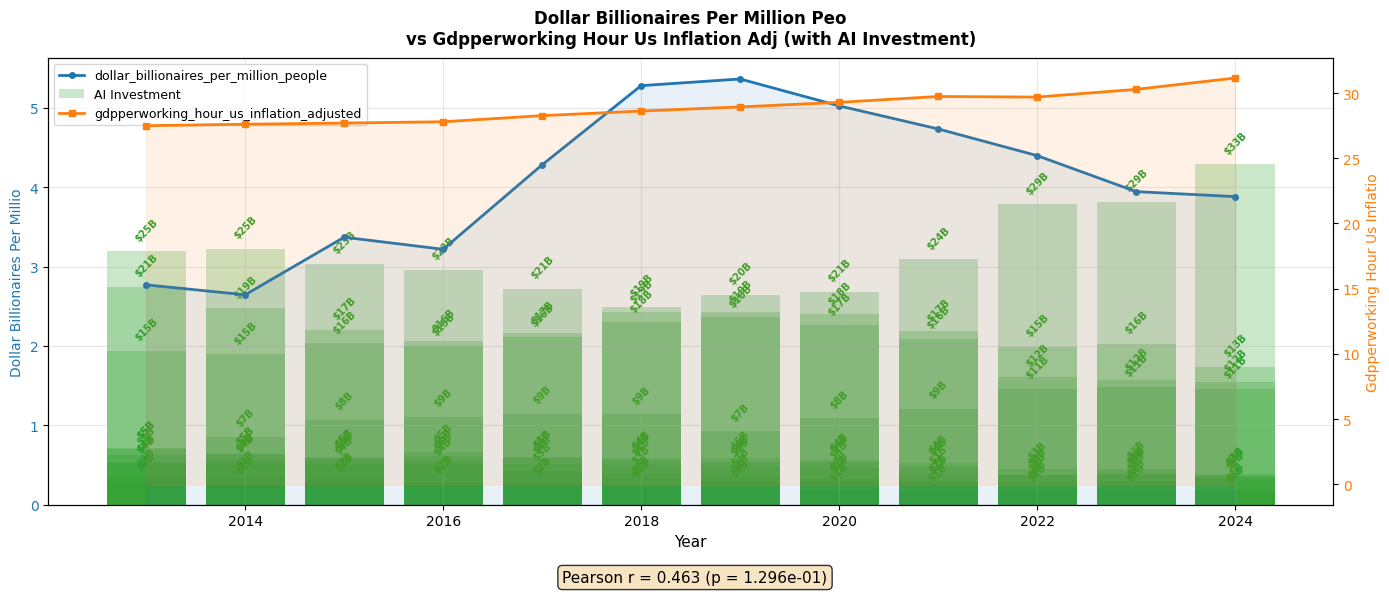

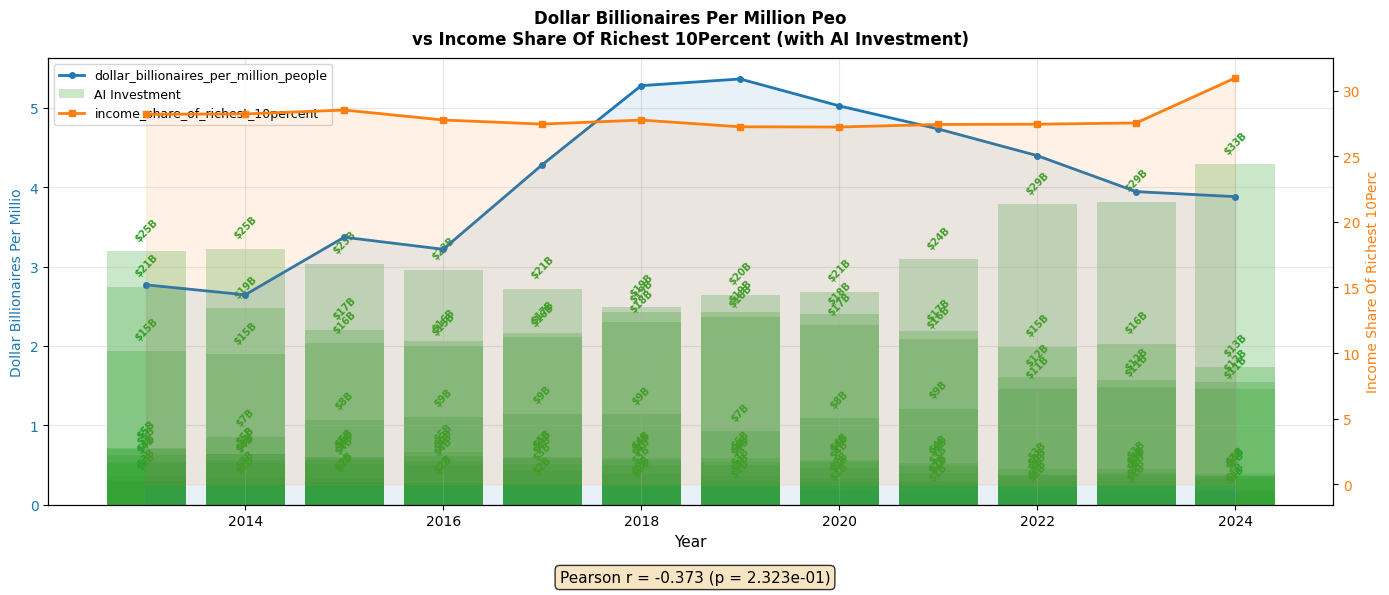

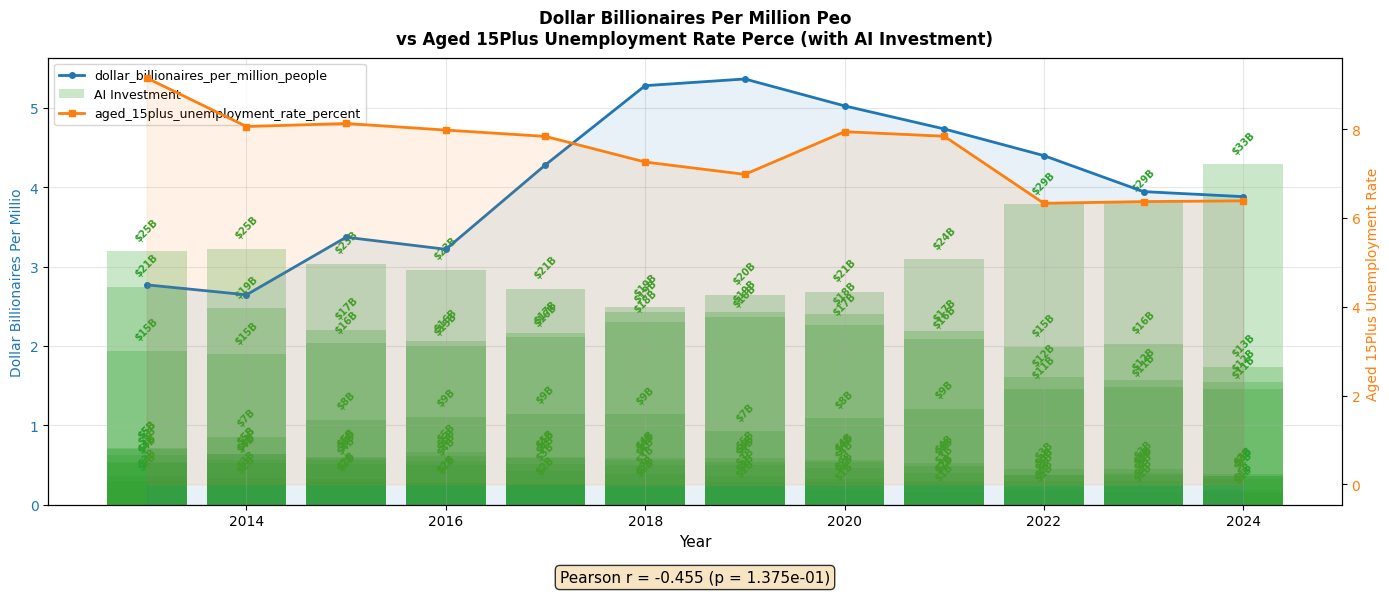

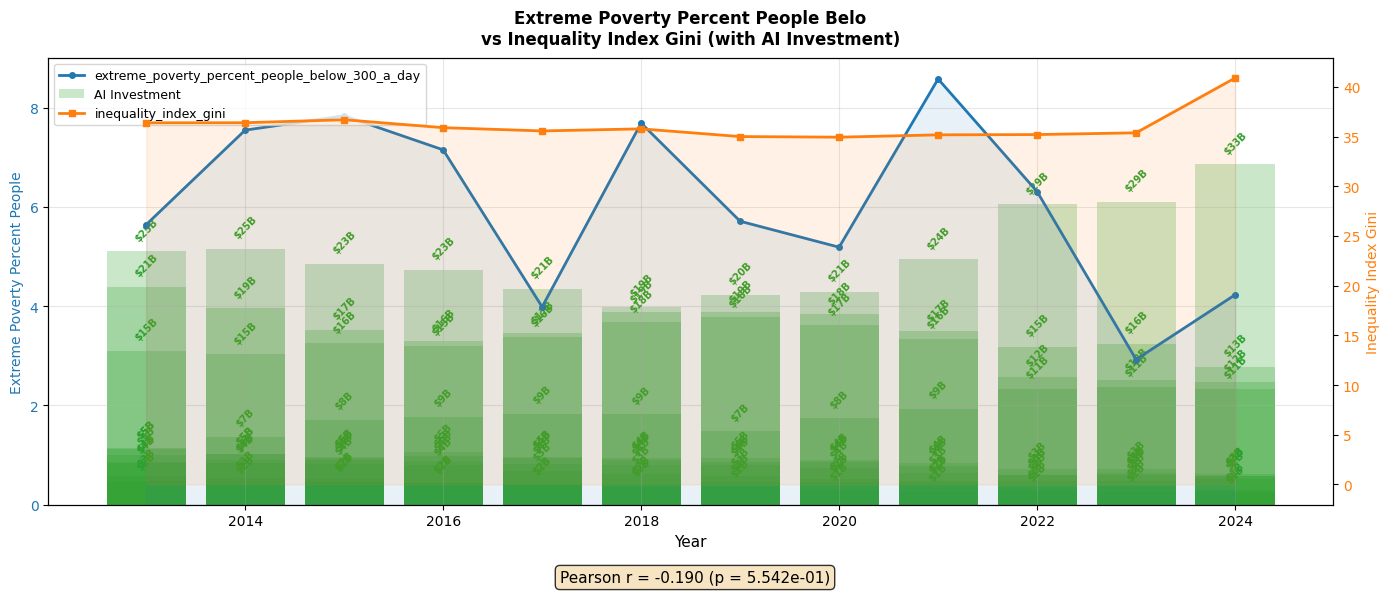

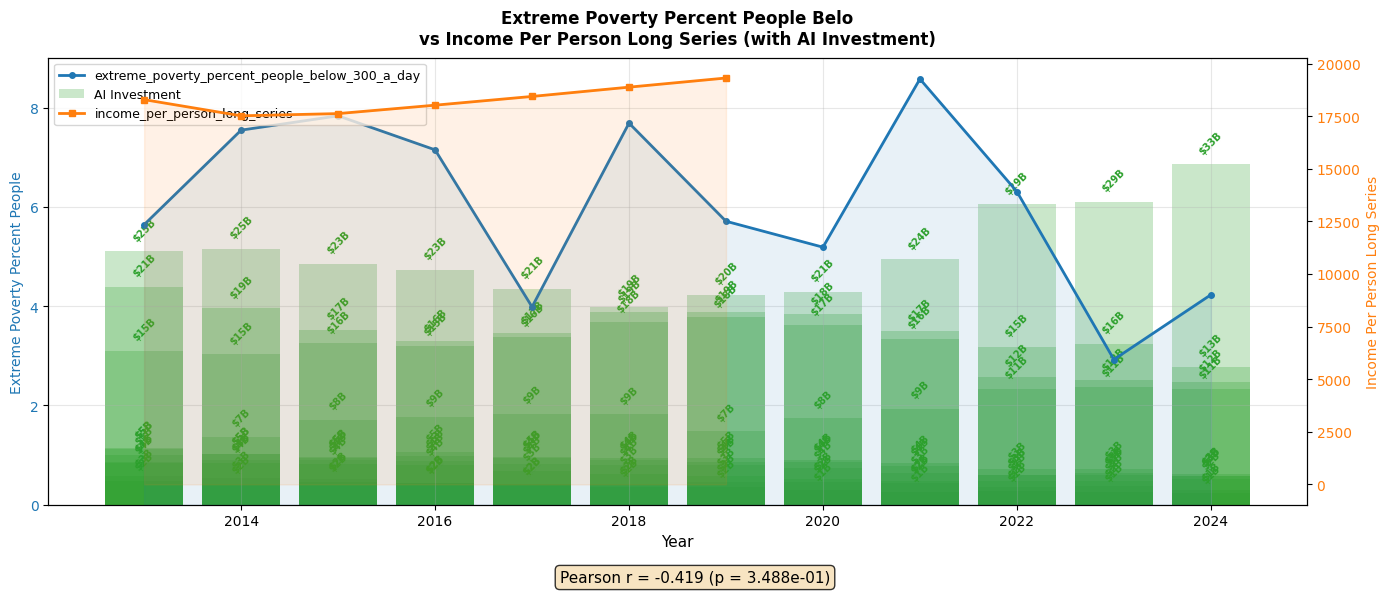

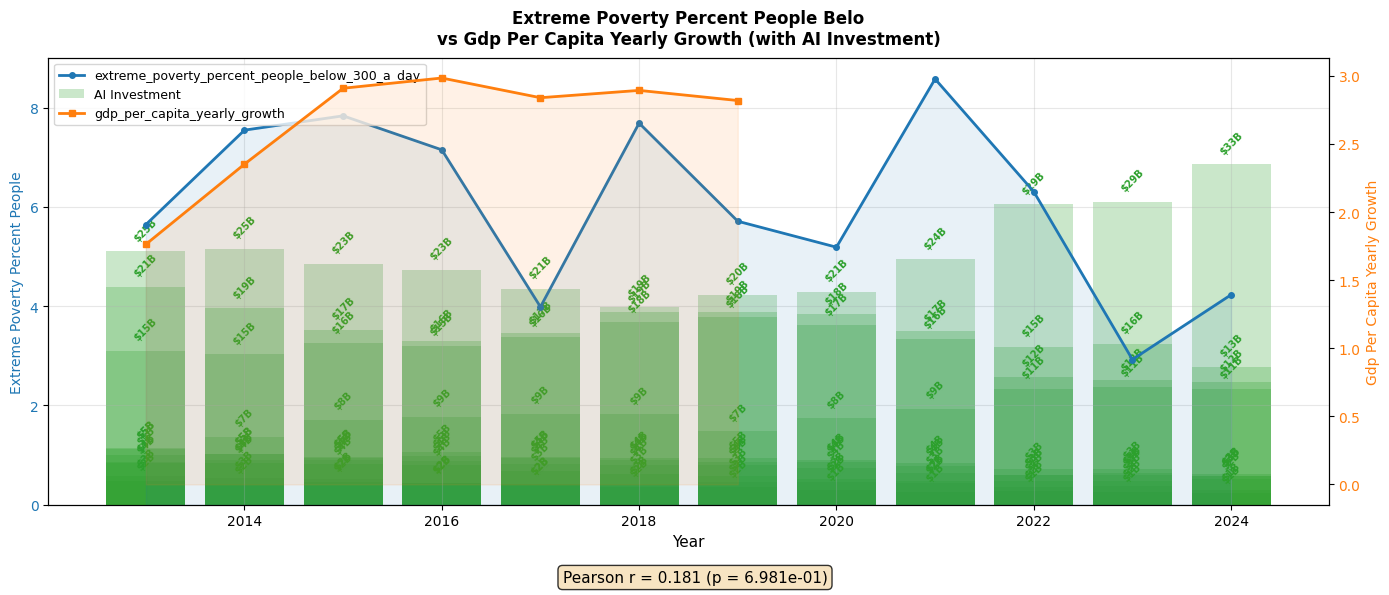

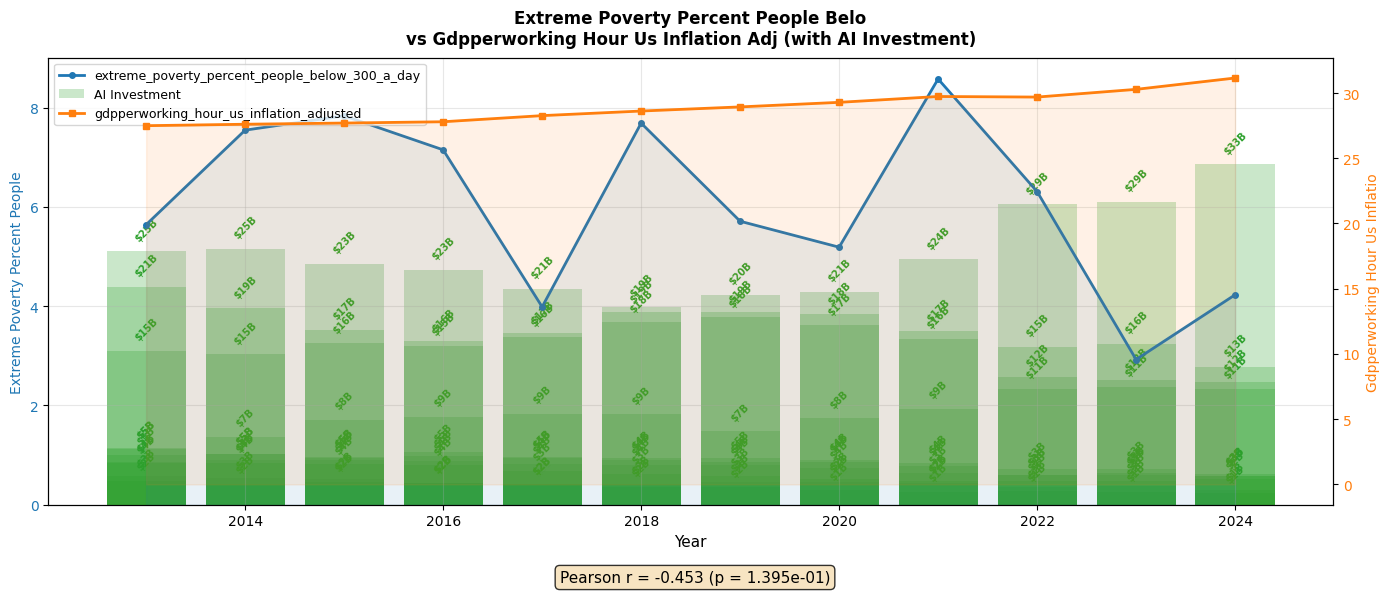

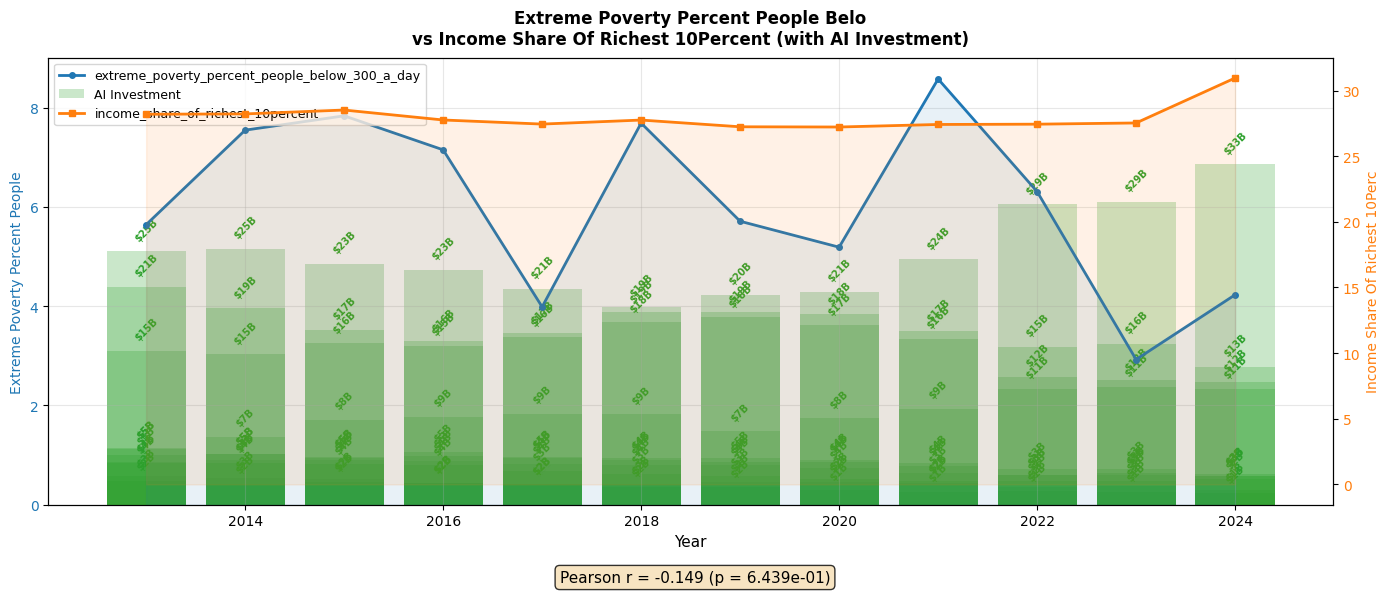

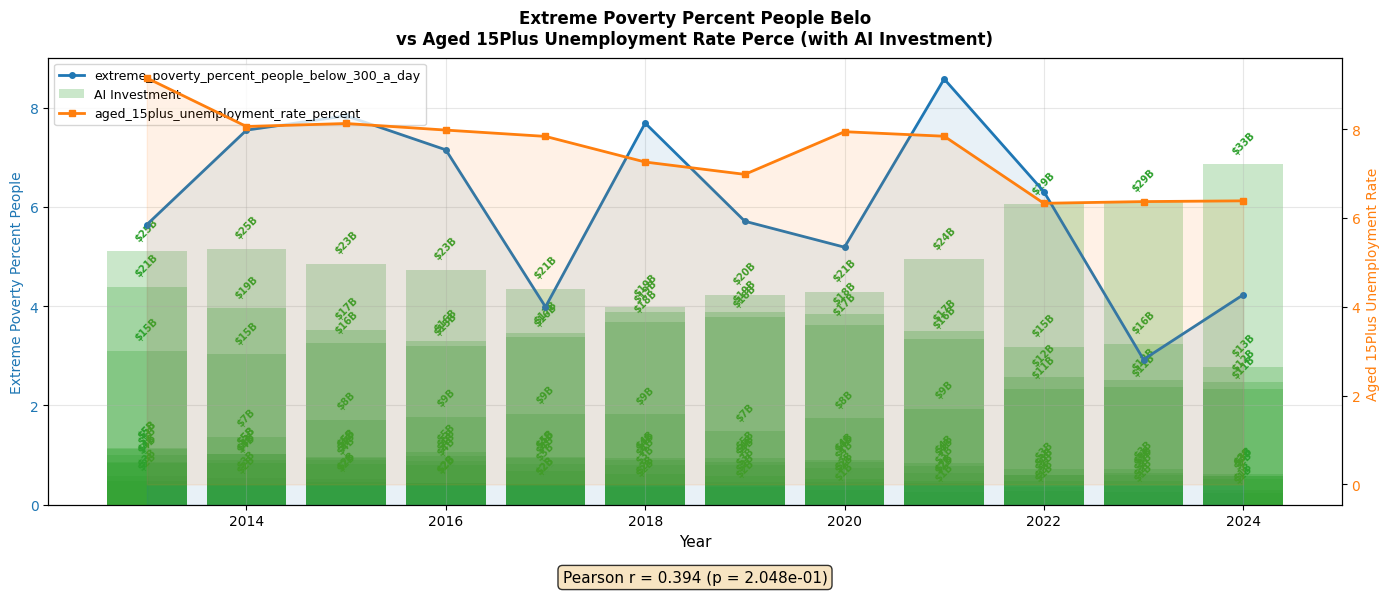

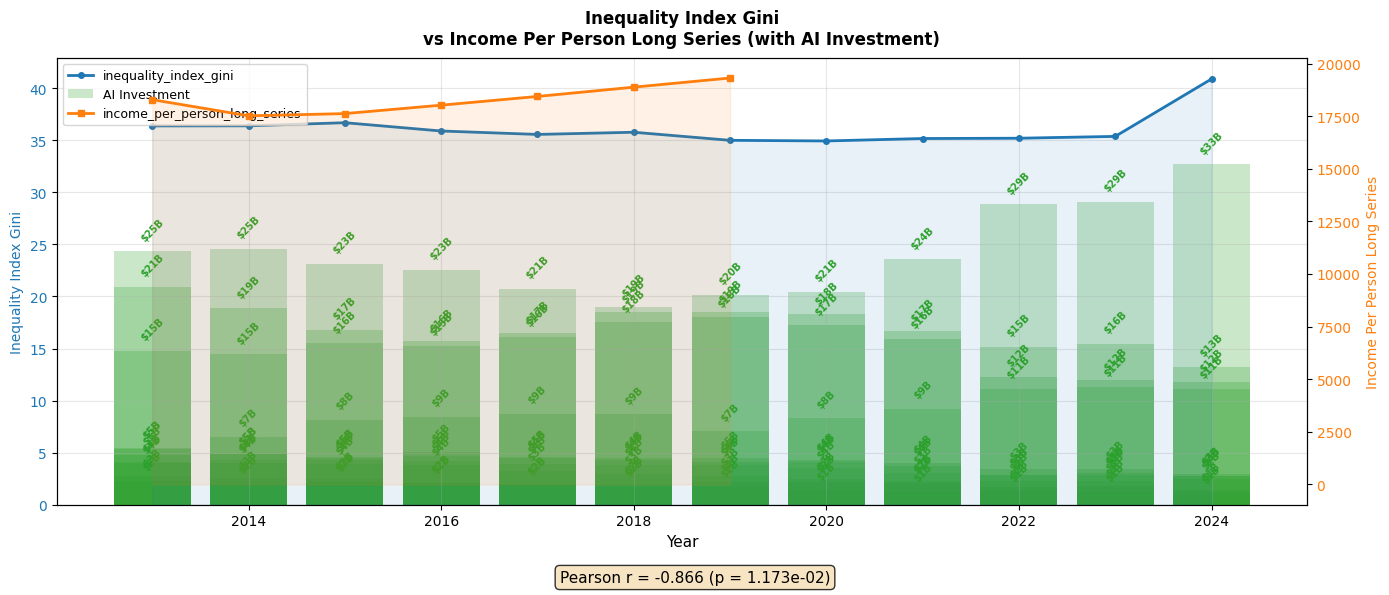

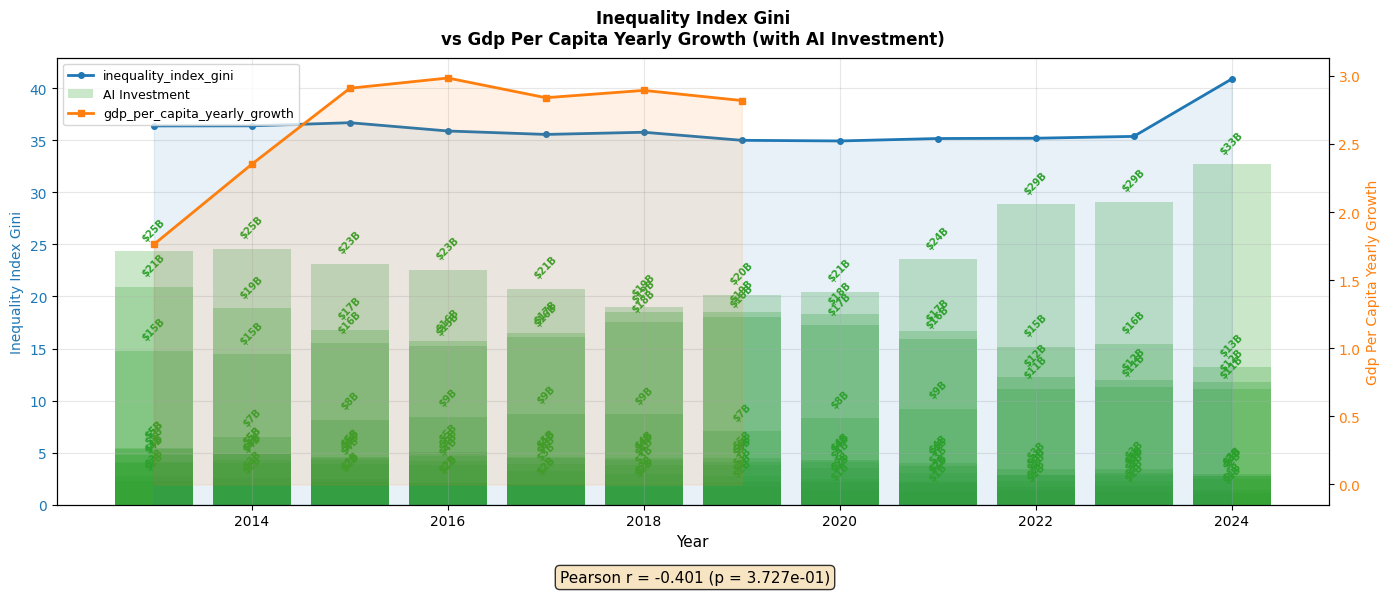

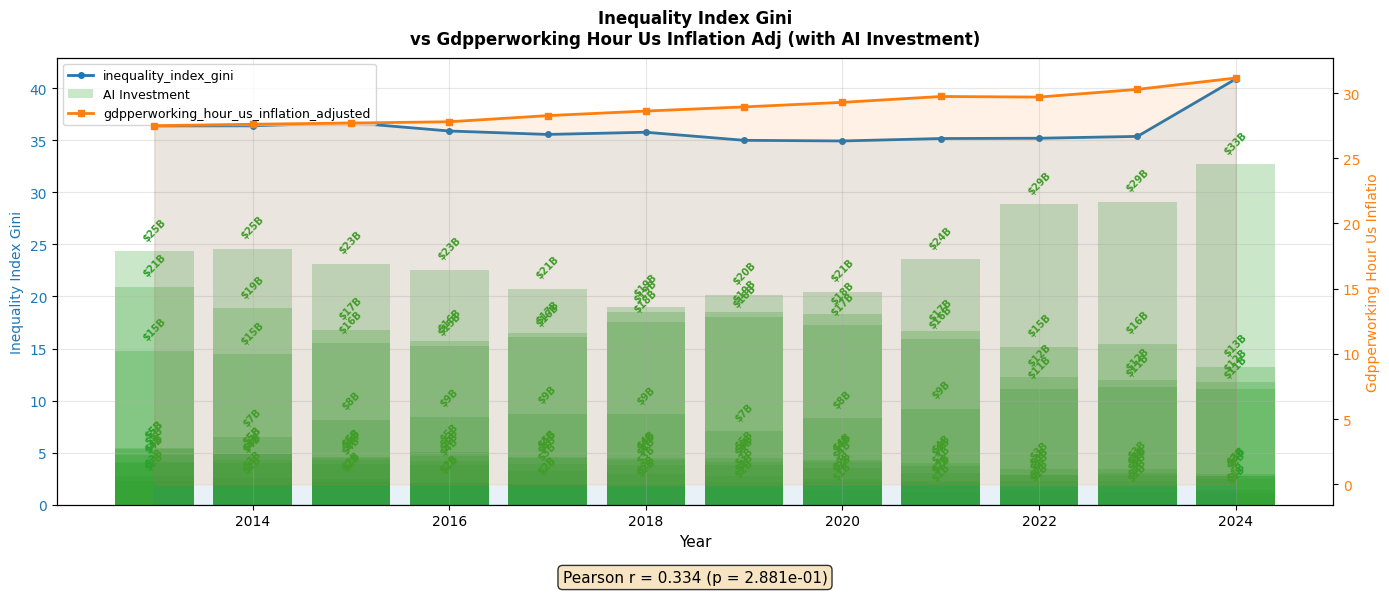

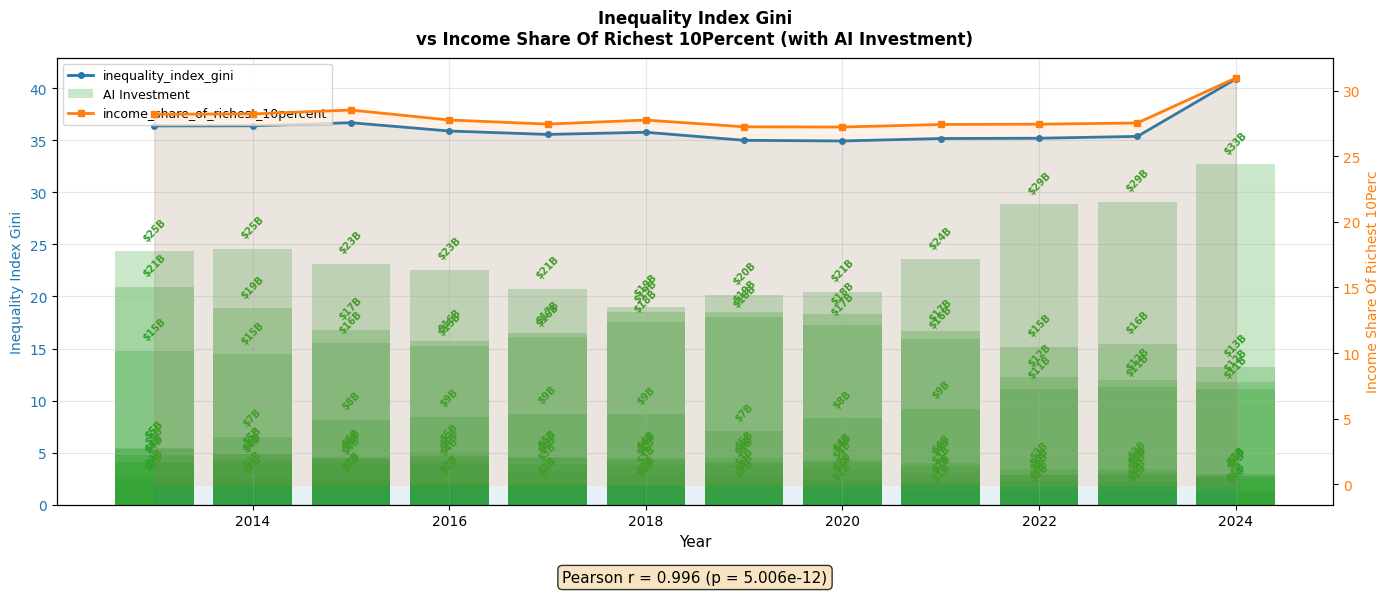

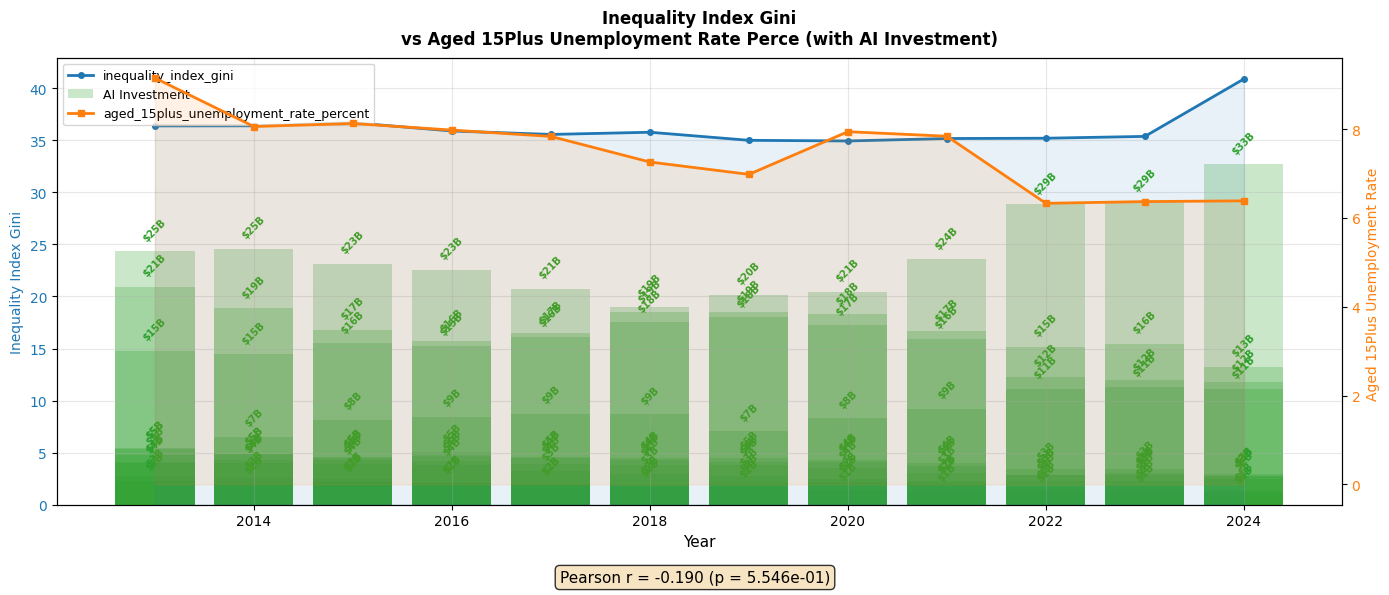

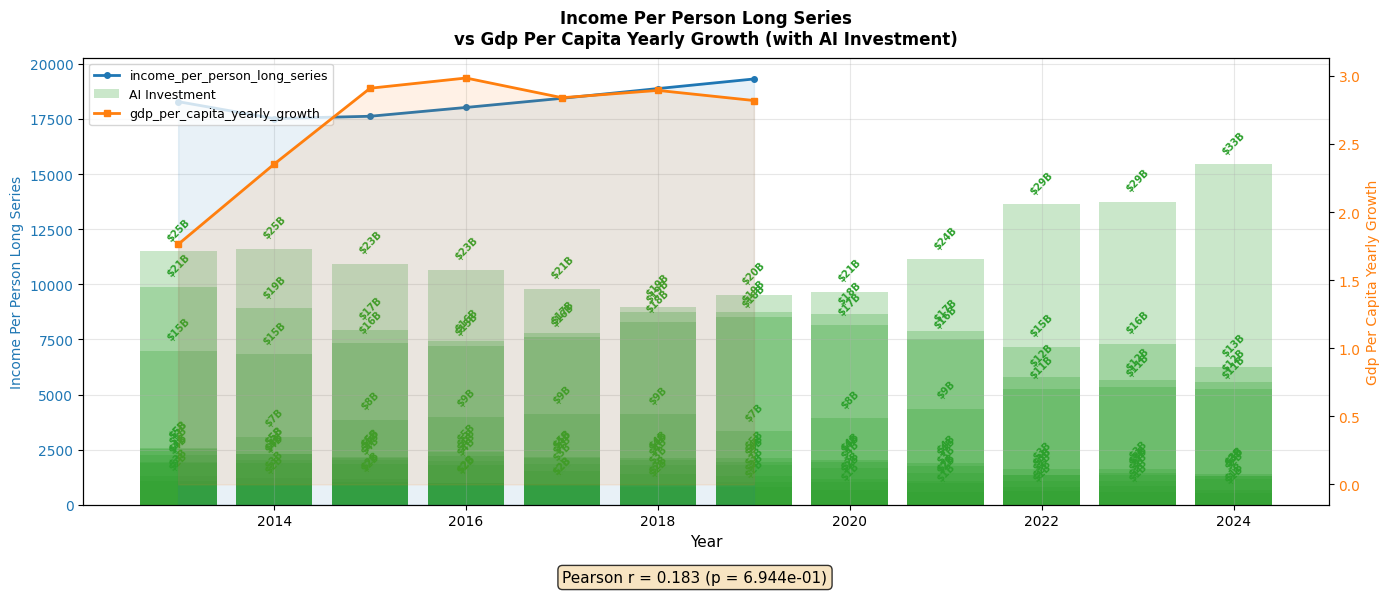

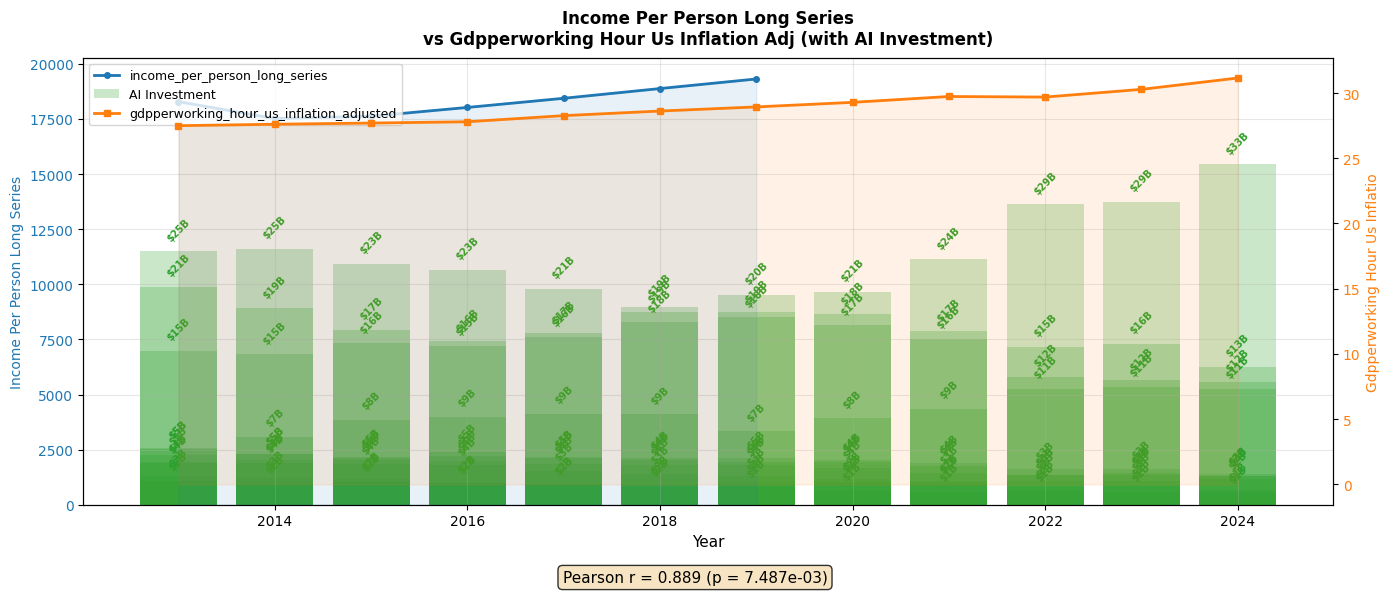

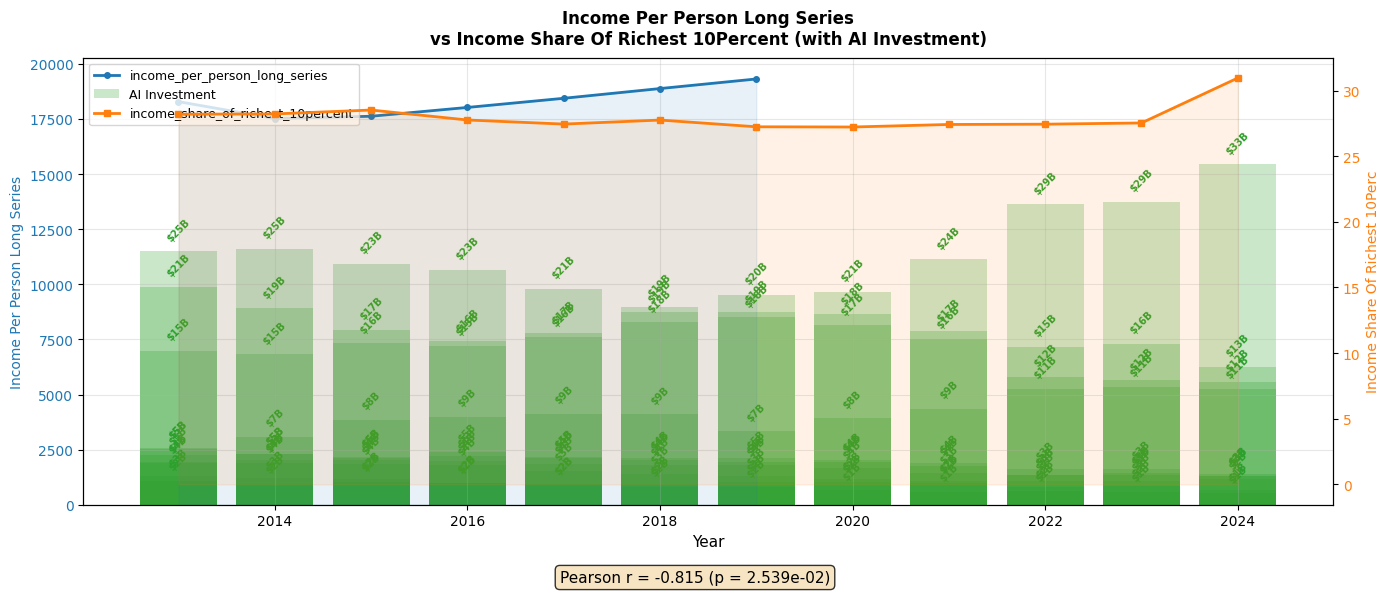

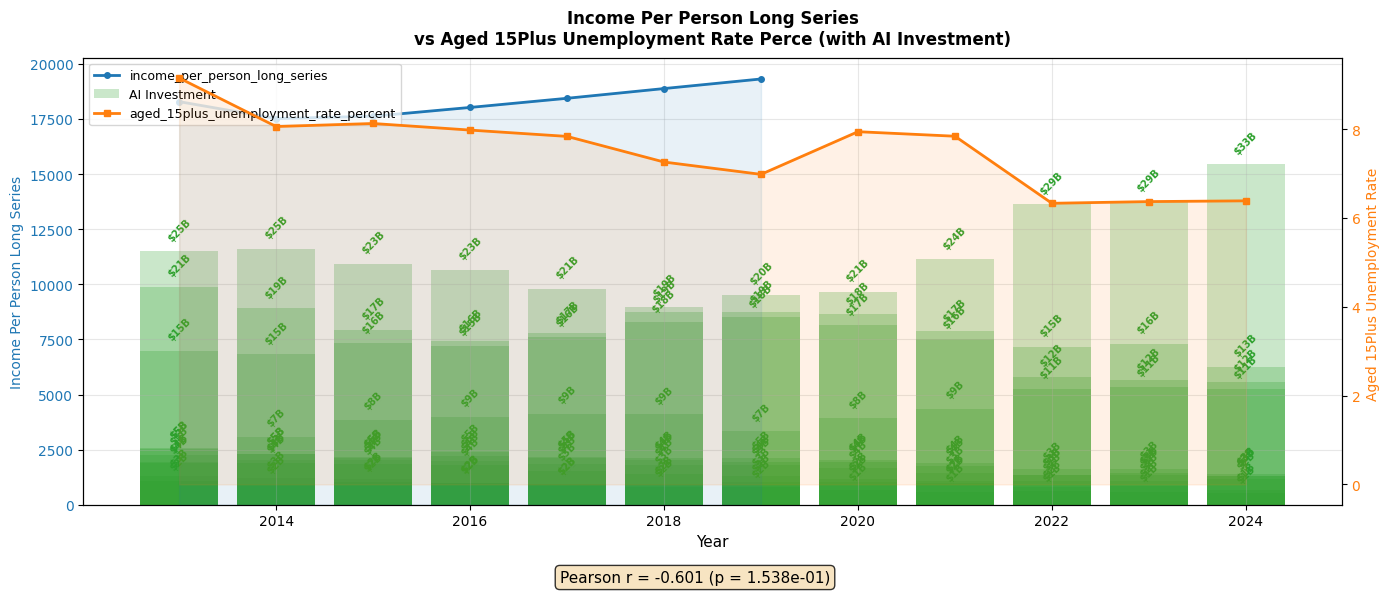

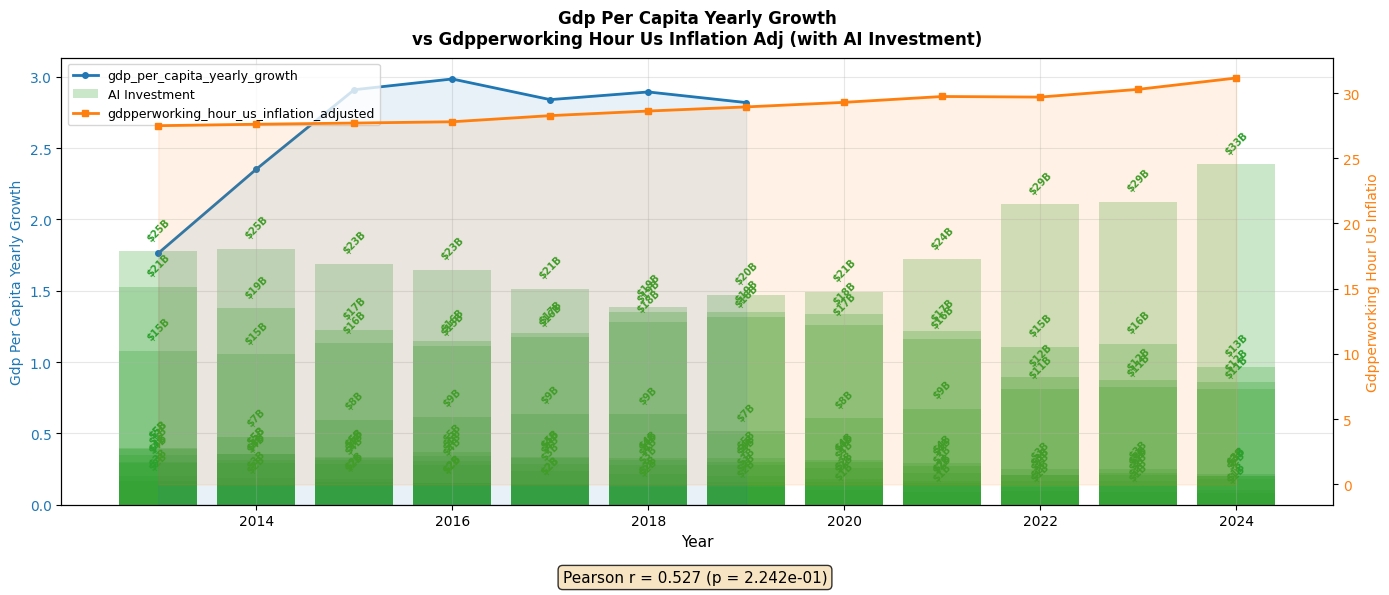

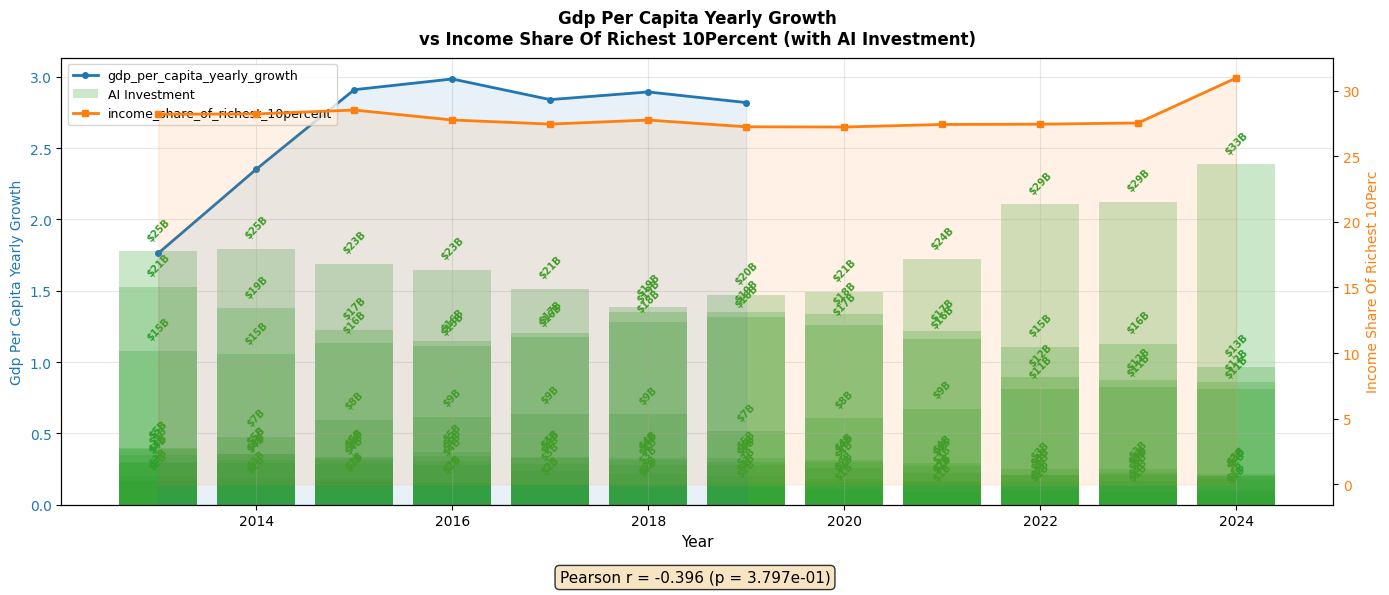

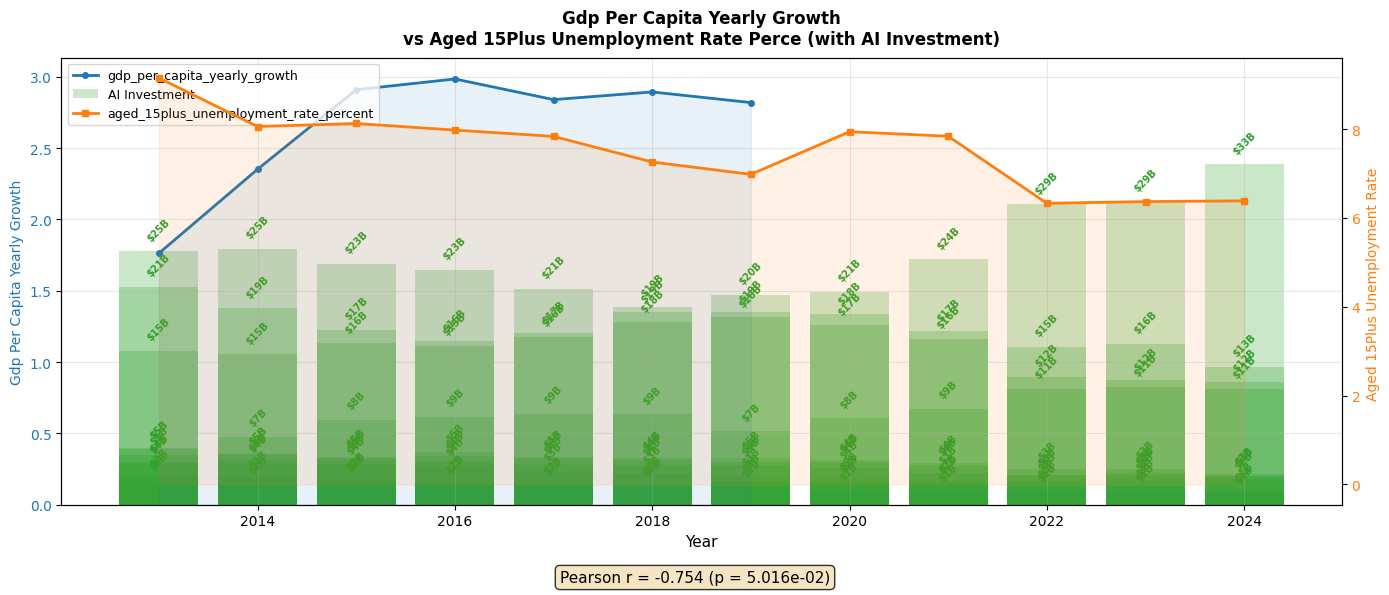

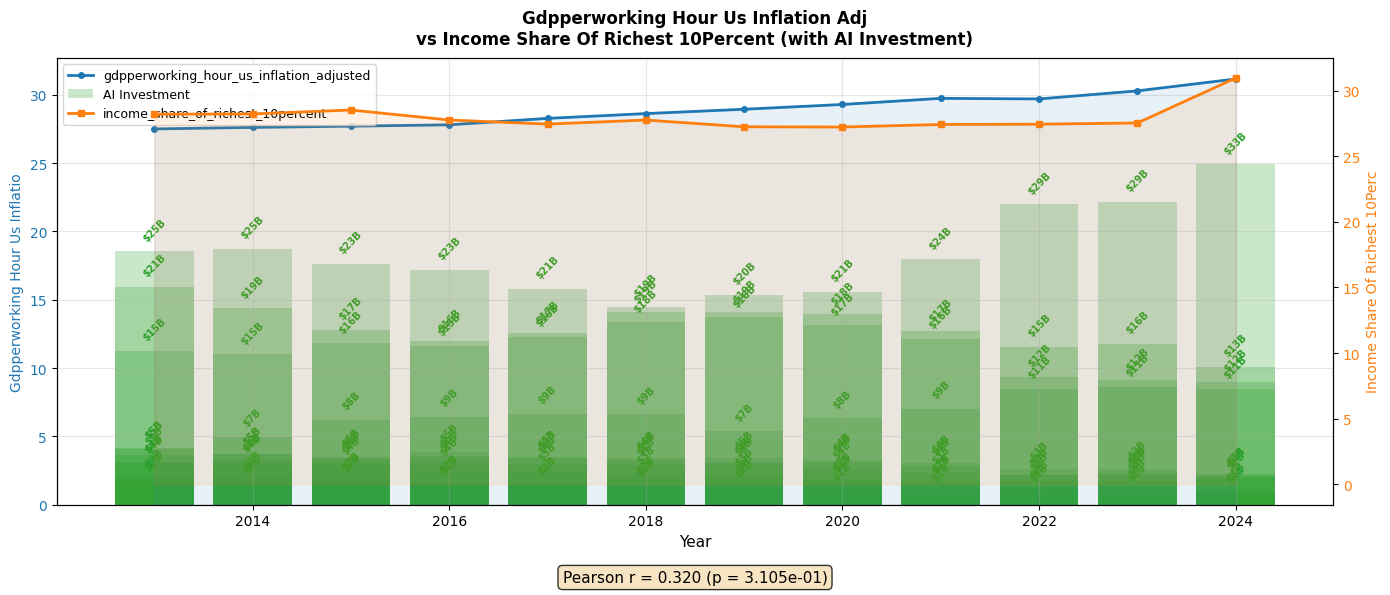

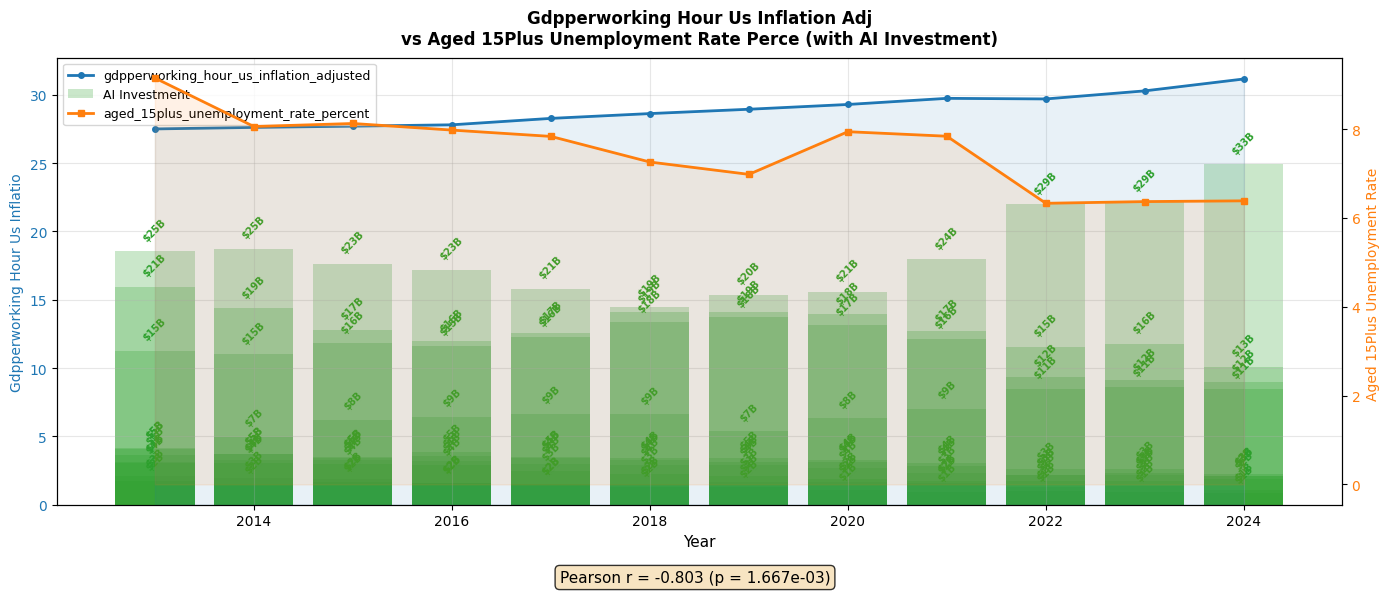

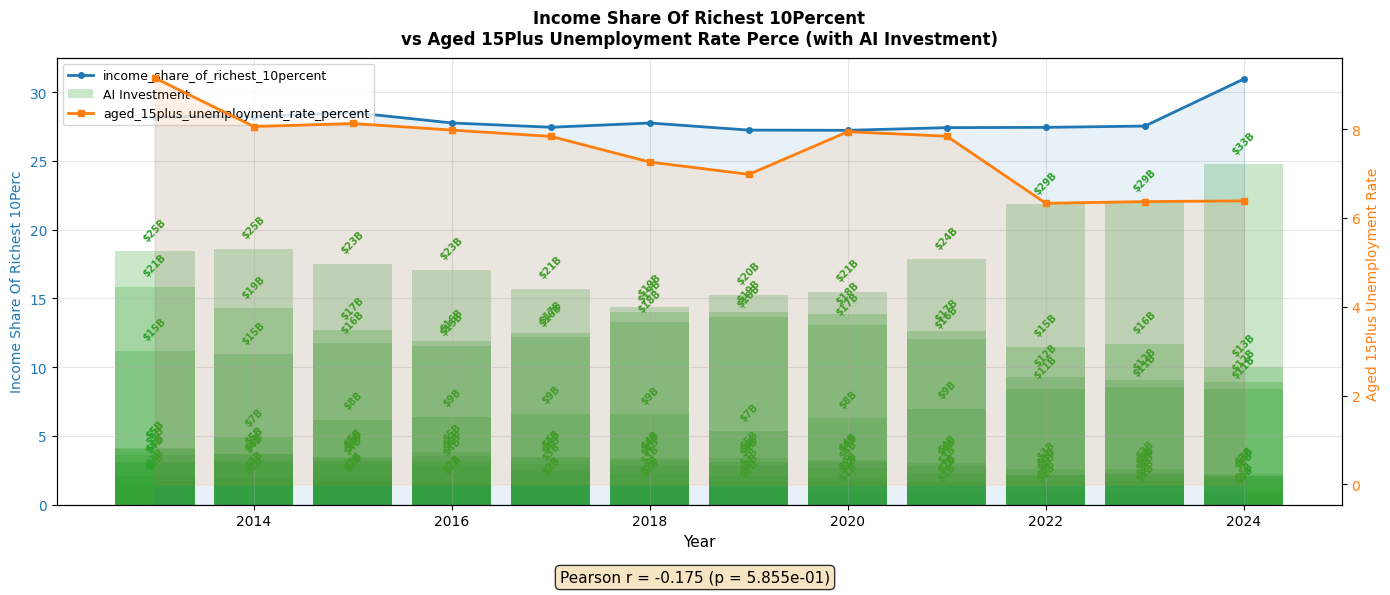

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from pathlib import Path
from itertools import combinations

# Load AI investment data globally
ai_publications_df = pd.read_csv('data/gapminder/AI_Technology/AI_publications_data.csv')

def load_economic_datasets():
    """Load all datasets from the Economic folder."""
    economic_dir = Path('./data/gapminder/Economic')
    datasets = {}
    
    for file in economic_dir.glob('ddf--datapoints--*--by--geo--time.csv'):
        # Extract indicator name from filename
        parts = file.name.split('--')
        if len(parts) >= 3:
            indicator = parts[2]
            df = pd.read_csv(file)
            datasets[indicator] = df
    return datasets

def create_dual_axis_plot(df1, df2, name1, name2, year_range=(2013, 2024)):
    """Create a dual-axis line graph with AI investment bars overlay."""
    col1 = [c for c in df1.columns if c not in ['geo', 'time']][0]
    col2 = [c for c in df2.columns if c not in ['geo', 'time']][0]
    
    df1_filtered = df1[(df1['time'] >= year_range[0]) & (df1['time'] <= year_range[1])]
    df2_filtered = df2[(df2['time'] >= year_range[0]) & (df2['time'] <= year_range[1])]
    
    agg1 = df1_filtered.groupby('time')[col1].mean().reset_index()
    agg2 = df2_filtered.groupby('time')[col2].mean().reset_index()
    
    if len(agg1) == 0 or len(agg2) == 0:
        return None
    
    ai_filtered = ai_publications_df[(ai_publications_df['year'] >= year_range[0]) & (ai_publications_df['year'] <= year_range[1])]
    
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Scale AI bars to fit primary y-axis
    ai_max = ai_filtered['publications'].max()
    y1_max = agg1[col1].max()
    ai_scaled = ai_filtered['publications'] * (y1_max / ai_max) * 0.8
    
    # AI Investment bars with labels on top
    bars = ax1.bar(ai_filtered['Year'], ai_scaled, alpha=0.25, color='#2ca02c', label='AI Investment', width=0.8, zorder=1)
    for bar, value in zip(bars, ai_filtered['publications']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + y1_max * 0.02, 
                 f'${value:.0f}B', ha='center', va='bottom', fontsize=7, color='#2ca02c', fontweight='bold', rotation=45)
    
    # First line (primary y-axis)
    ax1.set_xlabel('Year', fontsize=11)
    ax1.set_ylabel(name1.replace('_', ' ').title()[:30], color='#1f77b4', fontsize=10)
    ax1.plot(agg1['time'], agg1[col1], color='#1f77b4', linewidth=2, marker='o', markersize=4, label=name1, zorder=3)
    ax1.tick_params(axis='y', labelcolor='#1f77b4')
    ax1.fill_between(agg1['time'], agg1[col1], alpha=0.1, color='#1f77b4', zorder=2)
    
    # Second line (secondary y-axis)
    ax2 = ax1.twinx()
    ax2.set_ylabel(name2.replace('_', ' ').title()[:30], color='#ff7f0e', fontsize=10)
    ax2.plot(agg2['time'], agg2[col2], color='#ff7f0e', linewidth=2, marker='s', markersize=4, label=name2, zorder=3)
    ax2.tick_params(axis='y', labelcolor='#ff7f0e')
    ax2.fill_between(agg2['time'], agg2[col2], alpha=0.1, color='#ff7f0e', zorder=2)
    
    # Correlation
    merged = agg1.merge(agg2, on='time', how='inner')
    if len(merged) > 2:
        corr, p_val = pearsonr(merged[col1], merged[col2])
        fig.text(0.5, 0.02, f'Pearson r = {corr:.3f} (p = {p_val:.3e})', ha='center', fontsize=11, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)
    
    plt.title(f'{name1.replace("_", " ").title()[:35]}\nvs {name2.replace("_", " ").title()[:35]} (with AI Investment)', fontsize=12, fontweight='bold', pad=10)
    fig.tight_layout(rect=[0, 0.05, 1, 1])
    ax1.grid(True, alpha=0.3)
    return fig

# Load datasets and create all combination plots
economic_datasets = load_economic_datasets()
print(f'Found {len(economic_datasets)} datasets')

for name1, name2 in combinations(economic_datasets.keys(), 2):
    fig = create_dual_axis_plot(economic_datasets[name1], economic_datasets[name2], name1, name2)
    if fig:
        plt.show()
        plt.close()

Found 7 datasets


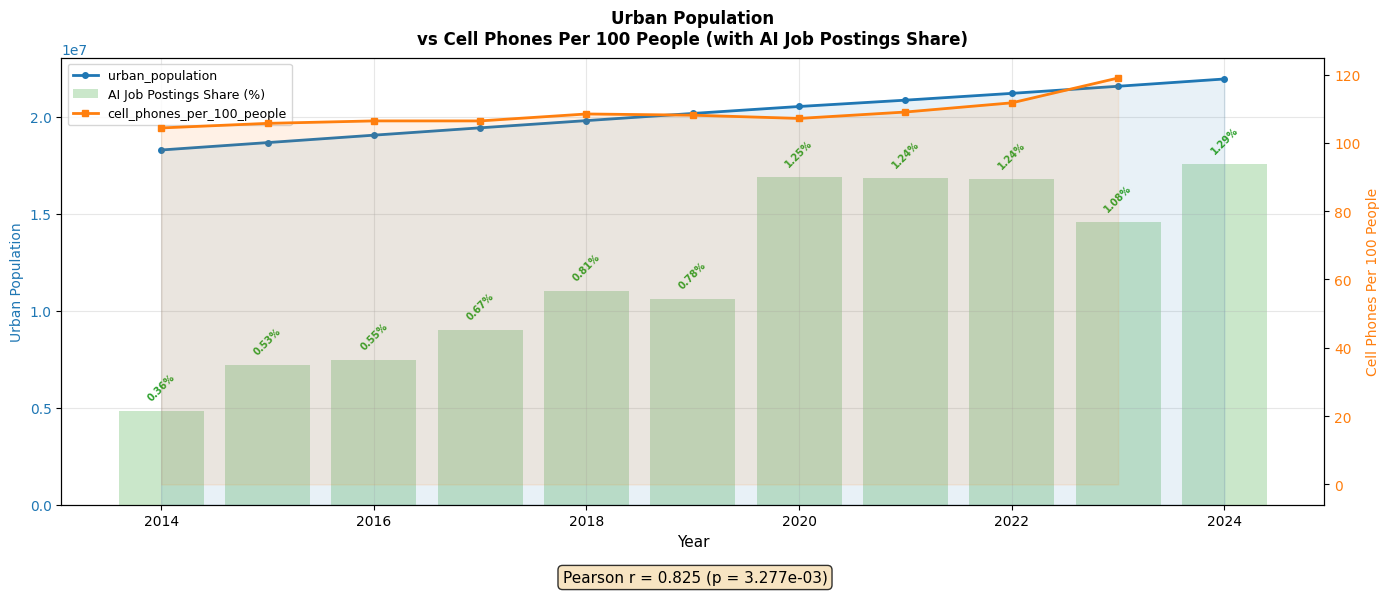

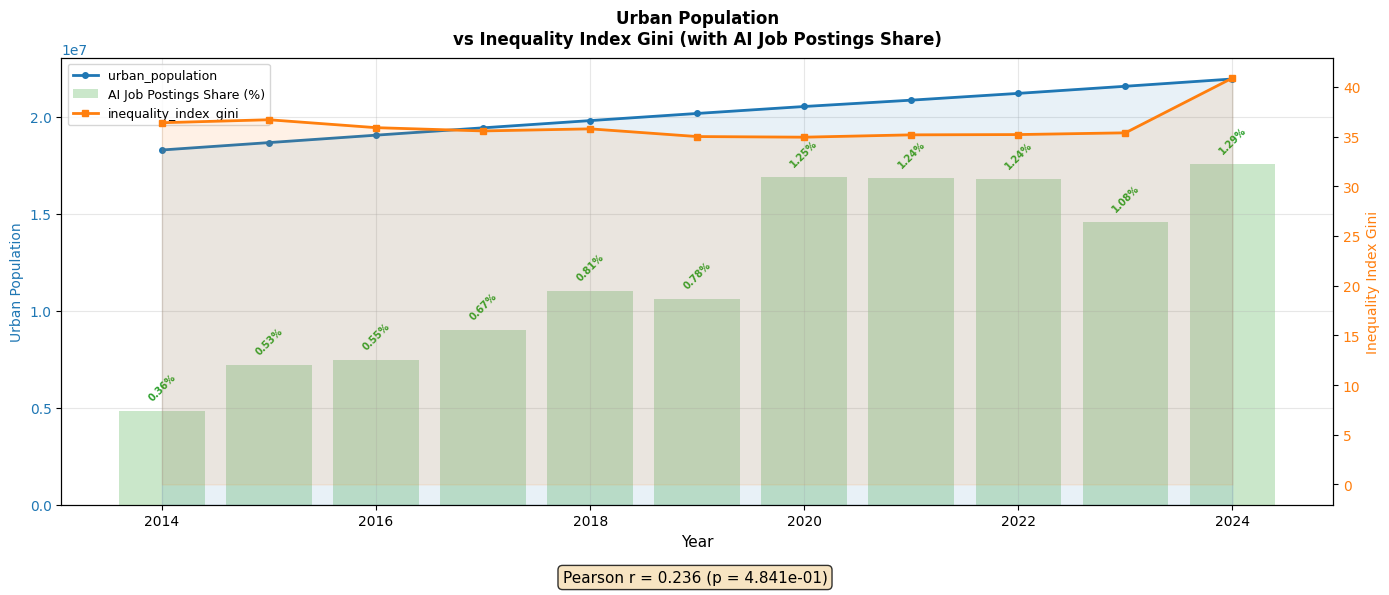

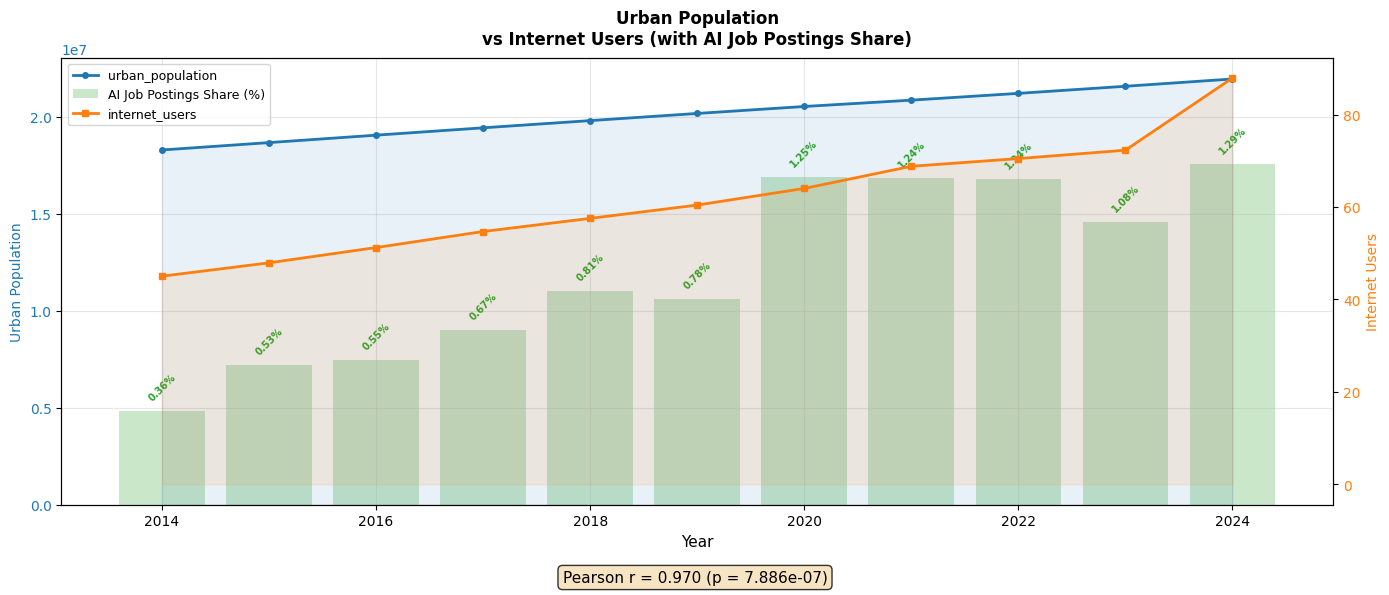

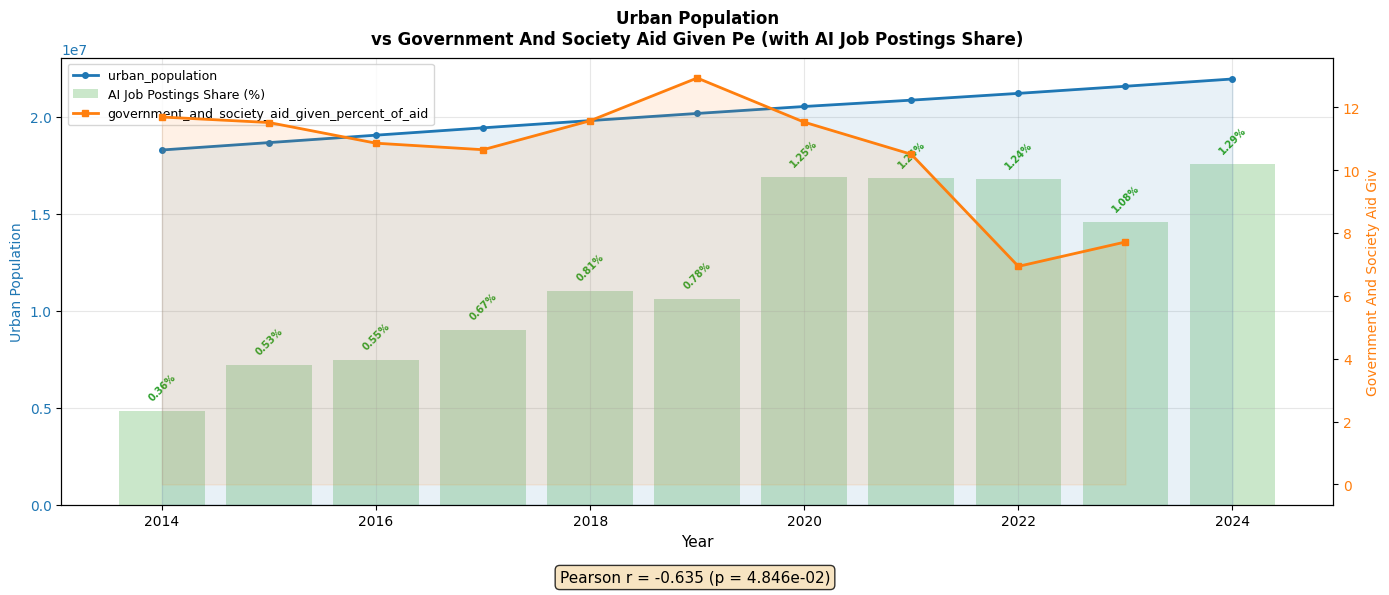

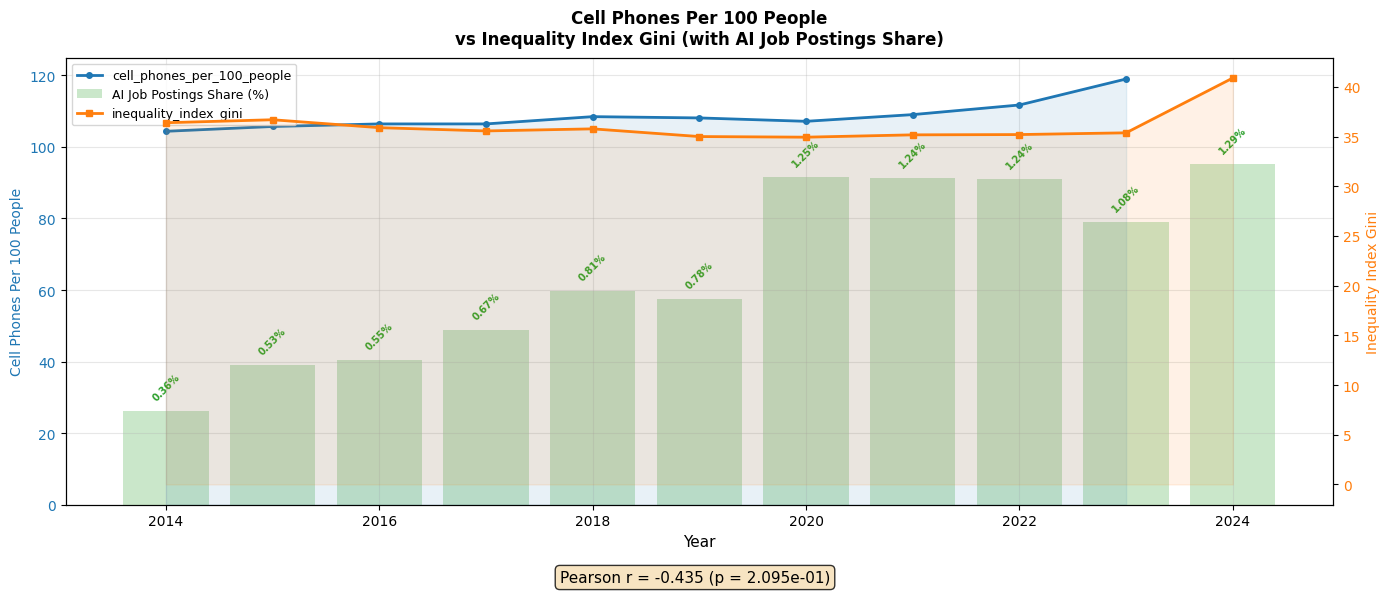

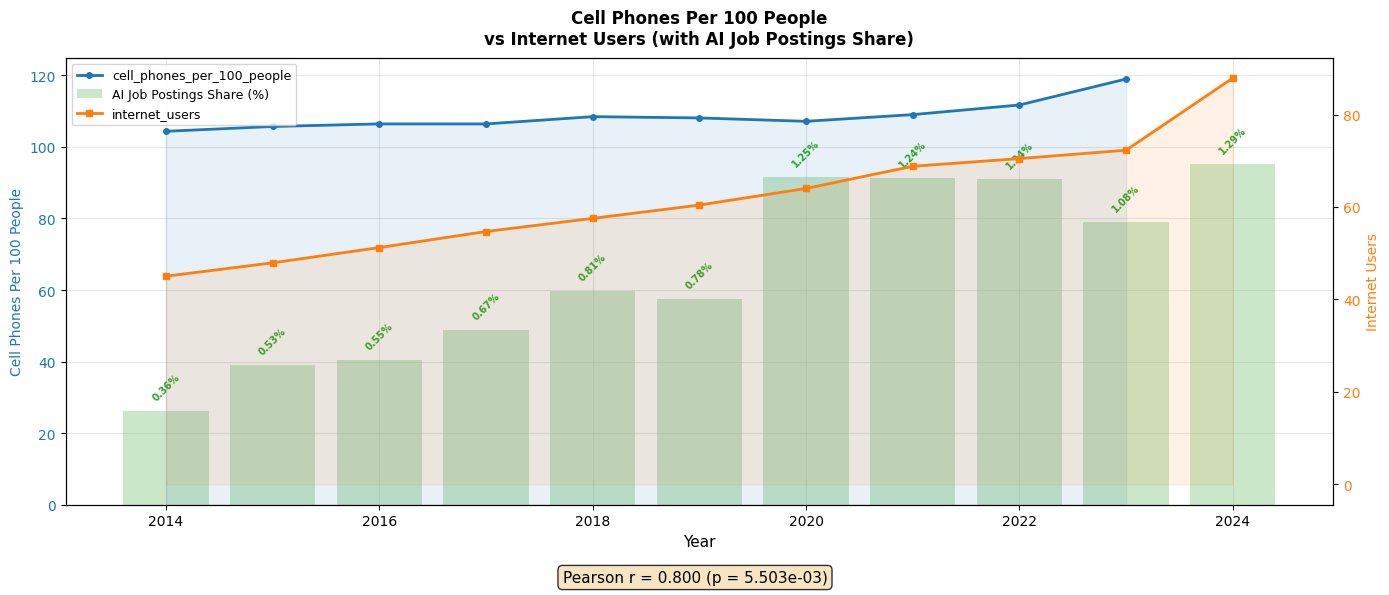

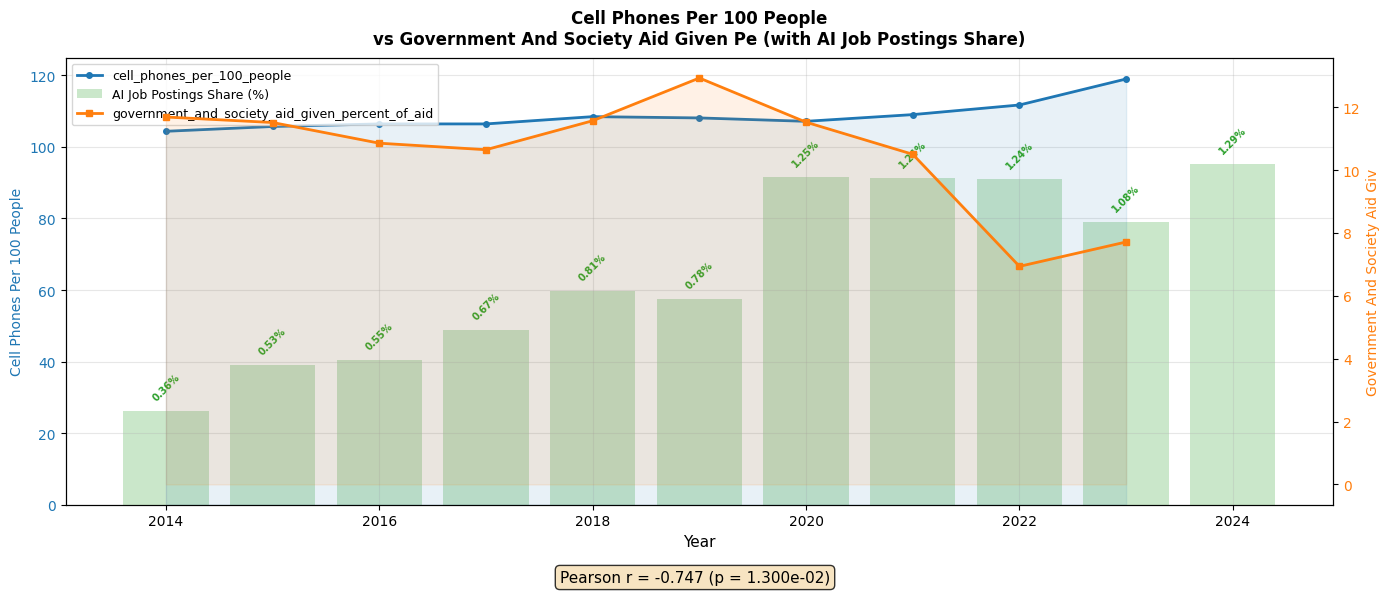

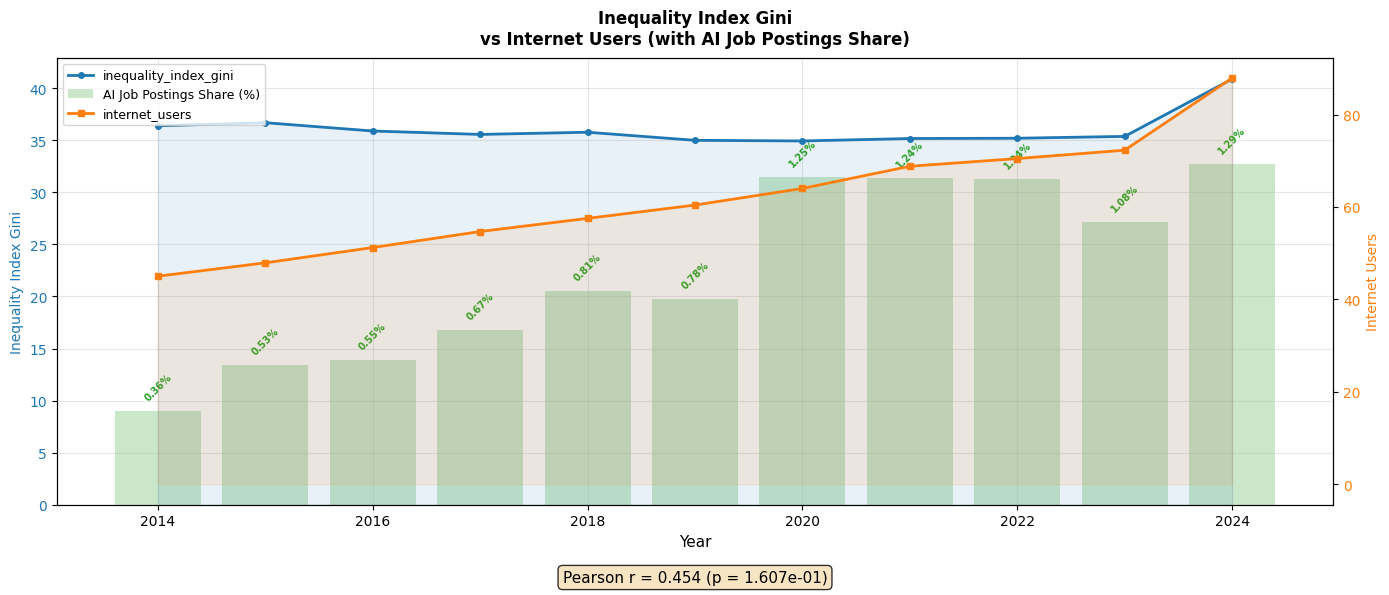

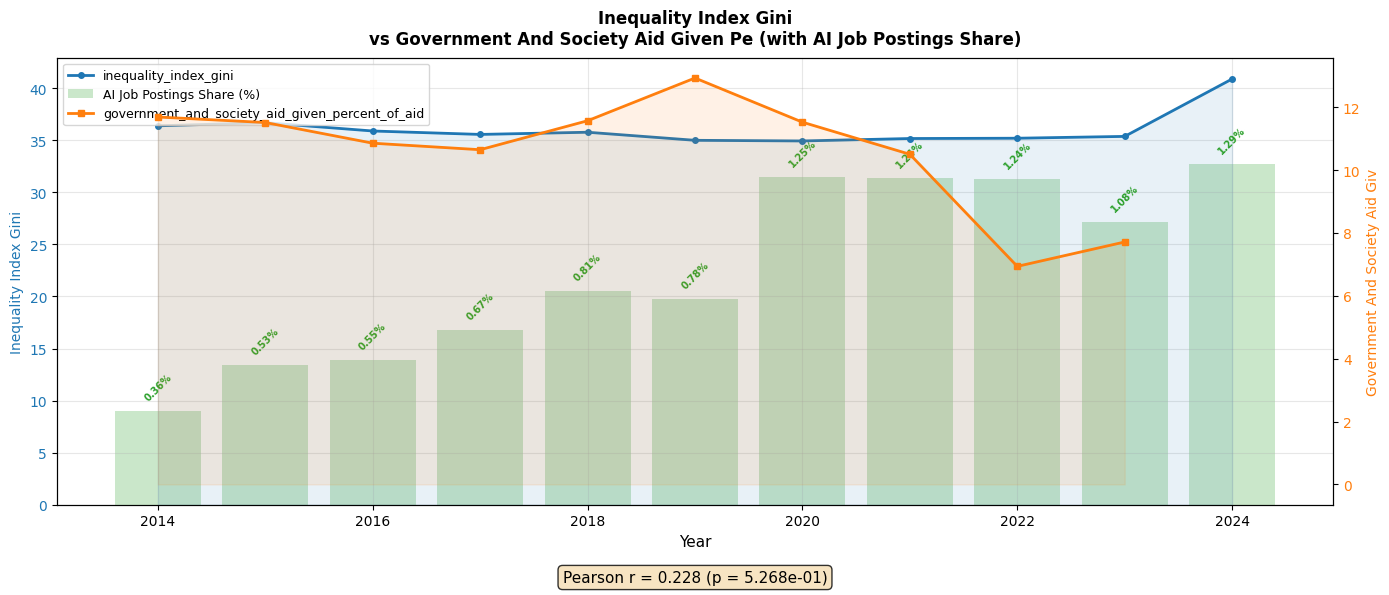

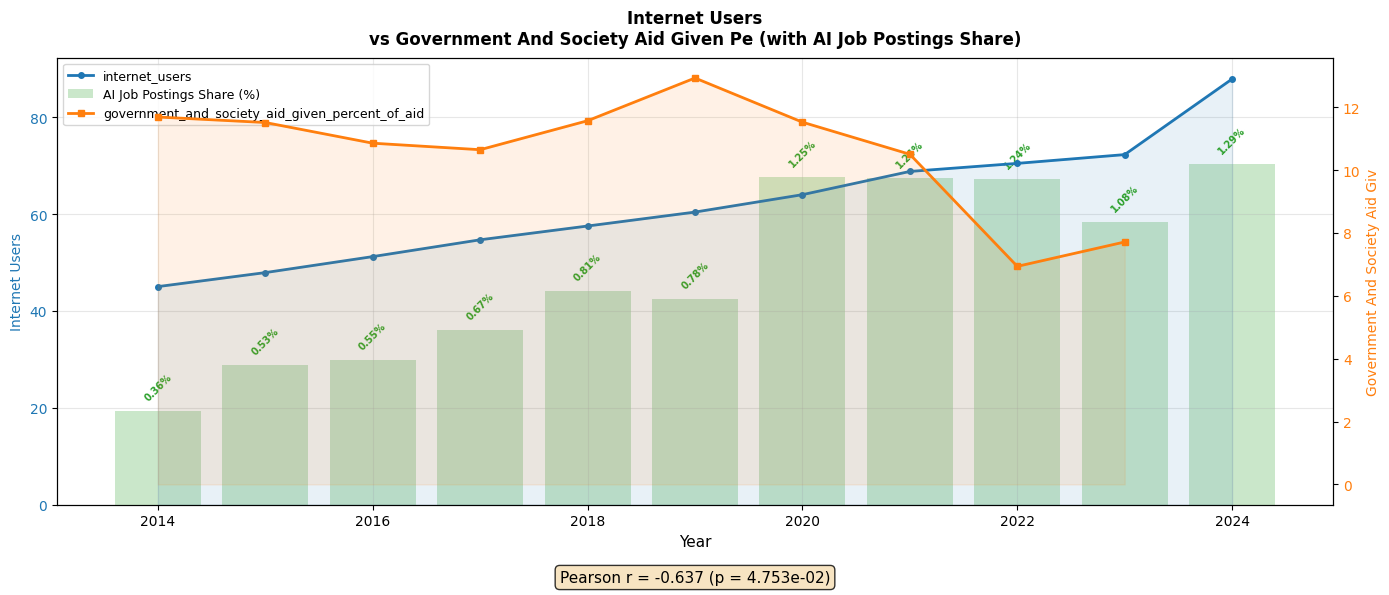

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from pathlib import Path
from itertools import combinations

# Load AI job postings data and compute global average by year
ai_jobs_df = pd.read_csv('data/gapminder/AI_Technology/share-artificial-intelligence-job-postings.csv')
ai_jobs_avg = ai_jobs_df.groupby('Year')['Share of artificial intelligence jobs among all job postings'].mean().reset_index()
ai_jobs_avg.columns = ['year', 'ai_share']

def load_social_datasets():
    """Load all datasets from the Social folder."""
    social_dir = Path('./data/gapminder/Social')
    datasets = {}
    
    for file in social_dir.glob('ddf--datapoints--*--by--geo--time.csv'):
        # Extract indicator name from filename
        parts = file.name.split('--')
        if len(parts) >= 3:
            indicator = parts[2]
            df = pd.read_csv(file)
            datasets[indicator] = df
    return datasets

def create_dual_axis_plot(df1, df2, name1, name2, year_range=(2014, 2024)):
    """Create a dual-axis line graph with AI job postings share overlay."""
    col1 = [c for c in df1.columns if c not in ['geo', 'time']][0]
    col2 = [c for c in df2.columns if c not in ['geo', 'time']][0]
    
    df1_filtered = df1[(df1['time'] >= year_range[0]) & (df1['time'] <= year_range[1])]
    df2_filtered = df2[(df2['time'] >= year_range[0]) & (df2['time'] <= year_range[1])]
    
    agg1 = df1_filtered.groupby('time')[col1].mean().reset_index()
    agg2 = df2_filtered.groupby('time')[col2].mean().reset_index()
    
    if len(agg1) == 0 or len(agg2) == 0:
        return None
    
    ai_filtered = ai_jobs_avg[(ai_jobs_avg['year'] >= year_range[0]) & (ai_jobs_avg['year'] <= year_range[1])]
    
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Scale AI bars to fit primary y-axis
    ai_max = ai_filtered['ai_share'].max()
    y1_max = agg1[col1].max()
    ai_scaled = ai_filtered['ai_share'] * (y1_max / ai_max) * 0.8
    
    # AI Job Postings Share bars with labels on top
    bars = ax1.bar(ai_filtered['year'], ai_scaled, alpha=0.25, color='#2ca02c', label='AI Job Postings Share (%)', width=0.8, zorder=1)
    for bar, value in zip(bars, ai_filtered['ai_share']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + y1_max * 0.02, 
                 f'{value:.2f}%', ha='center', va='bottom', fontsize=7, color='#2ca02c', fontweight='bold', rotation=45)
    
    # First line (primary y-axis)
    ax1.set_xlabel('Year', fontsize=11)
    ax1.set_ylabel(name1.replace('_', ' ').title()[:30], color='#1f77b4', fontsize=10)
    ax1.plot(agg1['time'], agg1[col1], color='#1f77b4', linewidth=2, marker='o', markersize=4, label=name1, zorder=3)
    ax1.tick_params(axis='y', labelcolor='#1f77b4')
    ax1.fill_between(agg1['time'], agg1[col1], alpha=0.1, color='#1f77b4', zorder=2)
    
    # Second line (secondary y-axis)
    ax2 = ax1.twinx()
    ax2.set_ylabel(name2.replace('_', ' ').title()[:30], color='#ff7f0e', fontsize=10)
    ax2.plot(agg2['time'], agg2[col2], color='#ff7f0e', linewidth=2, marker='s', markersize=4, label=name2, zorder=3)
    ax2.tick_params(axis='y', labelcolor='#ff7f0e')
    ax2.fill_between(agg2['time'], agg2[col2], alpha=0.1, color='#ff7f0e', zorder=2)
    
    # Correlation
    merged = agg1.merge(agg2, on='time', how='inner')
    if len(merged) > 2:
        corr, p_val = pearsonr(merged[col1], merged[col2])
        fig.text(0.5, 0.02, f'Pearson r = {corr:.3f} (p = {p_val:.3e})', ha='center', fontsize=11, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)
    
    plt.title(f'{name1.replace("_", " ").title()[:35]}\nvs {name2.replace("_", " ").title()[:35]} (with AI Job Postings Share)', fontsize=12, fontweight='bold', pad=10)
    fig.tight_layout(rect=[0, 0.05, 1, 1])
    ax1.grid(True, alpha=0.3)
    return fig

# Load datasets and create all combination plots
social_datasets = load_social_datasets()
print(f'Found {len(social_datasets)} datasets')

for name1, name2 in combinations(social_datasets.keys(), 2):
    fig = create_dual_axis_plot(social_datasets[name1], social_datasets[name2], name1, name2)
    if fig:
        plt.show()
        plt.close()
